#We are analysing world co2 emissions and their trend from 1751 to 2021.
#Although we have implemented linear regression and random forest to predict c02 emmission values they are just for learning purpose, the main aim of this notebook is to analyze the trend over the last years.


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
co2 = pd.read_csv("annual-co-emissions-by-region.csv")


In [7]:
co2.shape

(31349, 4)

In [8]:
co2.head()

Entity Code  Year  Annual CO2 emissions (M.M.tonnes )
0  Afghanistan  AFG  1949                            0.014656
1  Afghanistan  AFG  1950                            0.084272
2  Afghanistan  AFG  1951                            0.091600
3  Afghanistan  AFG  1952                            0.091600
4  Afghanistan  AFG  1953                            0.106256

In [9]:
co2.drop('Code',axis=1,inplace=True)

In [10]:
co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31349 entries, 0 to 31348
Data columns (total 3 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Entity                              31349 non-null  object 
 1   Year                                31349 non-null  int64  
 2   Annual CO2 emissions (M.M.tonnes )  31349 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 734.9+ KB


In [11]:
co2.rename(columns={'Entity':'Country'},inplace=True)

In [12]:
co2.Country.unique()

array(['Afghanistan', 'Africa', 'Africa (GCP)', 'Albania', 'Algeria',
       'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Asia (GCP)', 'Asia (excl. China and India)', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda',
       'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Central America (GCP)', 'Chad',
       'Chile', 'China', 'Christmas Island', 'Colombia', 'Comoros',
       'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
       'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Domini

In [24]:
len(co2.Country.unique())

258

#We have data from 258 unique countries

In [20]:
co2.Year.unique()

array([1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020, 2021, 1750, 1751, 1752, 1753,
       1754, 1755, 1756, 1757, 1758, 1759, 1760, 1761, 1762, 1763, 1764,
       1765, 1766, 1767, 1768, 1769, 1770, 1771, 1772, 1773, 1774, 1775,
       1776, 1777, 1778, 1779, 1780, 1781, 1782, 1783, 1784, 1785, 1786,
       1787, 1788, 1789, 1790, 1791, 1792, 1793, 1794, 1795, 1796, 1797,
       1798, 1799, 1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808,
       1809, 1810, 1811, 1812, 1813, 1814, 1815, 1816, 1817, 1818, 1819,
       1820, 1821, 1822, 1823, 1824, 1825, 1826, 18

In [22]:
len(co2.Year.unique())

272

#We have 272 years of data

In [14]:
co2.isna().sum()

Country                               0
Year                                  0
Annual CO2 emissions (M.M.tonnes )    0
dtype: int64

In [15]:
co2['Year'].value_counts()

Year
2021    248
2020    248
2019    248
2018    248
2017    248
       ... 
1768     34
1769     34
1770     34
1771     34
1772     34
Name: count, Length: 272, dtype: int64

In [16]:
co2['Country'].value_counts()

Country
Tuvalu                            272
World                             272
Africa                            272
Lower-middle-income countries     272
Martinique                        272
                                 ... 
French West Africa (GCP)            9
French Equatorial Africa (GCP)      9
Leeward Islands (GCP)               7
Kuwaiti Oil Fires (GCP)             1
Puerto Rico                         1
Name: count, Length: 258, dtype: int64

In [17]:
co2.Year.max()

2021

In [25]:
co2.Year.min()

1750

In [26]:
co2.columns

Index(['Country', 'Year', 'Annual CO2 emissions (M.M.tonnes )'], dtype='object')

In [27]:
co2['Annual CO2 emissions (M.M.tonnes )'] = pd.to_numeric(co2['Annual CO2 emissions (M.M.tonnes )'], errors='coerce')
condition = co2['Annual CO2 emissions (M.M.tonnes )'] >= 0
df = co2[condition]


In [28]:
df['Annual CO2 emissions (M.M.tonnes )'].min()

0.0

In [29]:
df['Annual CO2 emissions (M.M.tonnes )'].max()

37123.85

# So we have 0 MM tones as minimum carbon emission and 37123 MM tonnes as maximum carbon emission.

#**CO2 Emission Trends**




In [32]:
trend=co2.groupby('Year')['Annual CO2 emissions (M.M.tonnes )'].sum()[:-1]
trend

Year
1750        56.103168
1751        56.103168
1752        56.125152
1753        56.125152
1754        56.147136
            ...      
2016    231125.675244
2017    234640.977755
2018    238844.138610
2019    240014.940852
2020    228843.032497
Name: Annual CO2 emissions (M.M.tonnes ), Length: 271, dtype: float64

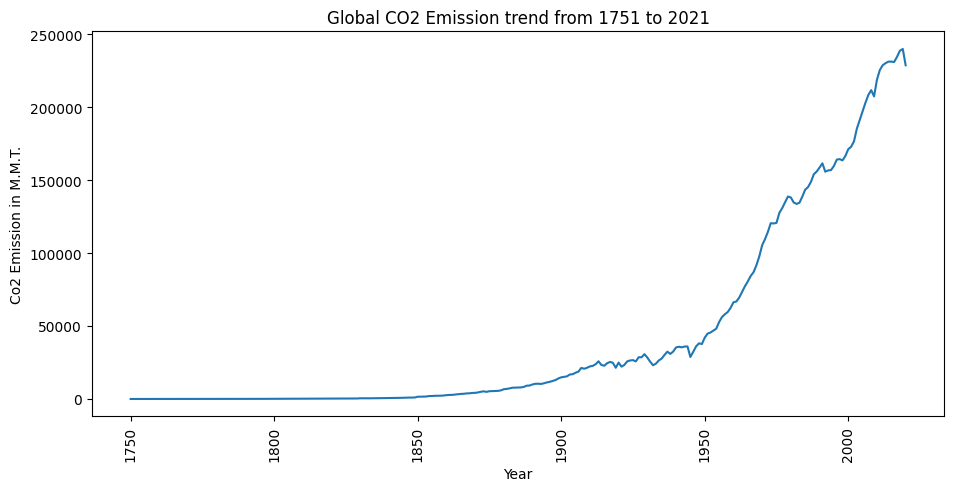

In [33]:
plt.figure(figsize=(11,5))
sns.lineplot(x=trend.index,y=trend.values)
plt.xticks(rotation=90)
plt.title('Global CO2 Emission trend from 1751 to 2021')
plt.xlabel('Year')
plt.ylabel('Co2 Emission in M.M.T.')
plt.show()

#As industralisation increased in world the global co2 emissions also increased with a sudden spike from 1950 due to third Industrial Revolution

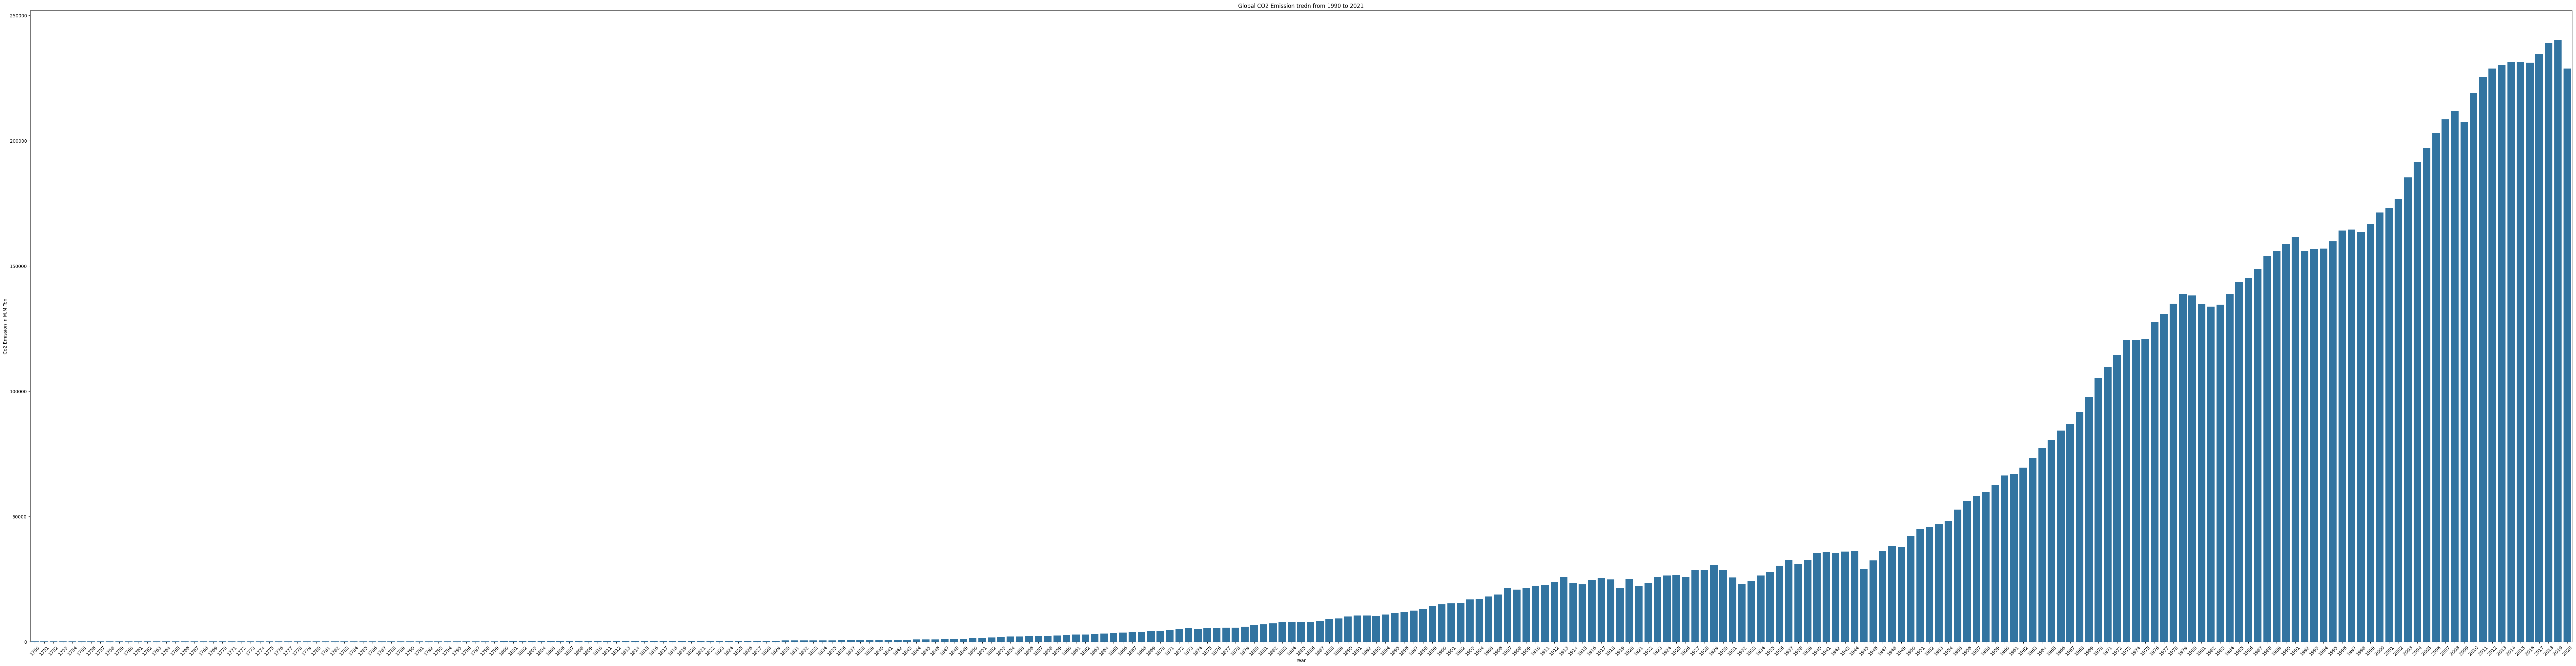

In [34]:
plt.figure(figsize=(100,25))
sns.barplot(x=trend.index,y=trend.values)
plt.xticks(rotation=45)
plt.title('Global CO2 Emission tredn from 1990 to 2021')
plt.xlabel('Year')
plt.ylabel('Co2 Emission in M.M.Ton')
plt.show()

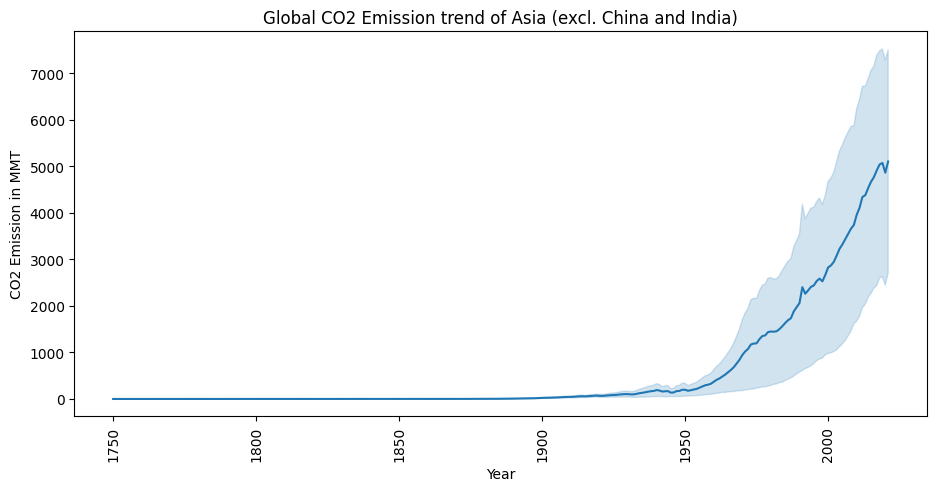

In [35]:
def visualize_country_trend(country=None):
    country = country.title()
    if country is None:
        print('Please give a country name')
        return

    fdata = co2[(co2['Country'].str.contains(country) & (co2['Year'] != '202'))]

    if len(fdata) == 0:
        print('Country name not found')
        return


    country = fdata['Country'].unique()[0]
    plt.figure(figsize=(11, 5))
    sns.lineplot(data=fdata, x='Year', y='Annual CO2 emissions (M.M.tonnes )')
    plt.xticks(rotation=90)
    plt.title(f'Global CO2 Emission trend of {country}')
    plt.xlabel('Year')
    plt.ylabel('CO2 Emission in MMT')
    plt.show()

visualize_country_trend('India')


In [36]:
co2.groupby('Country')['Annual CO2 emissions (M.M.tonnes )'].sum().sort_values(ascending=False)

Country
World                    1.736930e+06
High-income countries    9.886392e+05
OECD (GCP)               9.563439e+05
Non-OECD (GCP)           7.329609e+05
Asia                     5.575965e+05
                             ...     
Niue                     3.019870e-01
Tuvalu                   2.868180e-01
Puerto Rico              2.088480e-01
Leeward Islands (GCP)    1.795360e-01
Antarctica               1.538880e-01
Name: Annual CO2 emissions (M.M.tonnes ), Length: 258, dtype: float64

In [37]:
co2.groupby('Country')['Annual CO2 emissions (M.M.tonnes )'].sum().sort_values(ascending=False)[1:6]

Country
High-income countries    988639.203400
OECD (GCP)               956343.912440
Non-OECD (GCP)           732960.919224
Asia                     557596.537847
Europe                   537244.200202
Name: Annual CO2 emissions (M.M.tonnes ), dtype: float64

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')




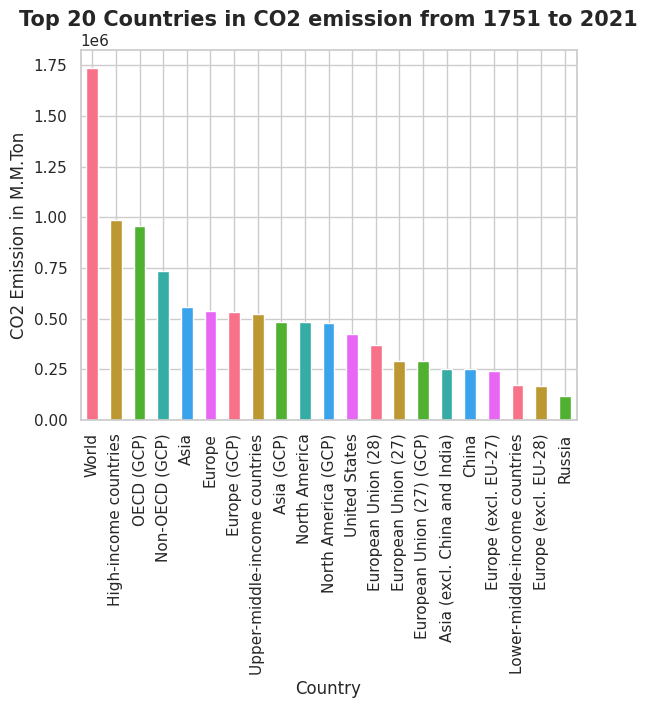

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

color_palette = "husl"

sns.set(style="whitegrid", palette=color_palette)

co2.groupby('Country')['Annual CO2 emissions (M.M.tonnes )'].sum().sort_values(ascending=False)[0:21].plot(kind='bar', color=sns.color_palette(color_palette))
plt.title('Top 20 Countries in CO2 emission from 1751 to 2021', fontweight='bold', fontsize=15)
plt.ylabel('CO2 Emission in M.M.Ton')

plt.show()


### Now we will classify our data into time periods and analyse each one of them
### Period1 samaller then or equal 1800(from 1751 to 1800)
#### Period2 samaller then or equal 1850 and greater then 1800(from 1801 to 1850)
#### Period3 samaller then or equal 1900 and greater then 1850(from 1851 to 1900)
#### Period4 samaller then or equal 1950 and greater then 1900(from 1901 to 1950)
#### Period5 samaller then or equal 2000 and greater then 1951(from 1951 to 2000)
#### Period6 greater than 2000

In [40]:
p1_c1=df['Year']<=1800
period1=df[p1_c1]

In [41]:
p2_c1=df['Year']<=1850
p2_c2=df['Year']>1800
period2=df[p2_c1 & p2_c2]

In [42]:
p3_c1=df['Year']<=1900
p3_c2=df['Year']>1850
period3=df[p3_c1 & p3_c2]

In [43]:
p4_c1=df['Year']<=1950
p4_c2=df['Year']>1900
period4=df[p4_c1 & p4_c2]

In [44]:
p5_c1=df['Year']<=2000
p5_c2=df['Year']>1950
period5=df[p5_c1 & p5_c2]

In [45]:
p6_c1=df['Year']>2000
period6=df[p6_c1]

### Now let's see CO2 emission in each period grouped by country

#### period 1 from 1751-1800

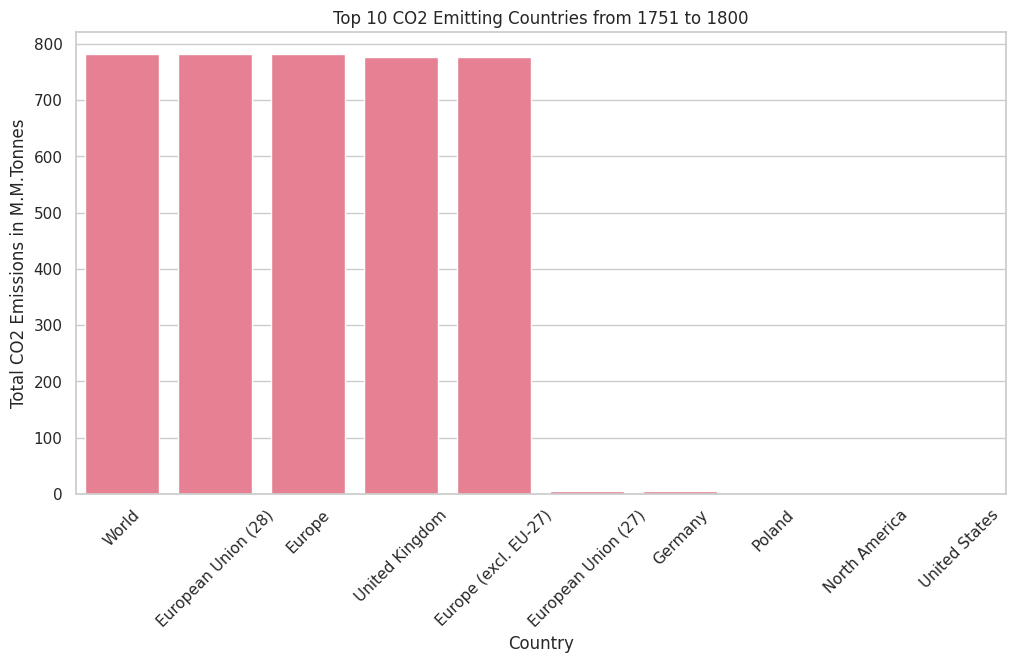

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

top_10_countries = period1.groupby('Country')['Annual CO2 emissions (M.M.tonnes )'].sum().sort_values(ascending=False)[1:11]


country_names = top_10_countries.index
co2_emissions = top_10_countries.values

plt.figure(figsize=(12, 6))
sns.barplot(x=country_names, y=co2_emissions)
plt.title('Top 10 CO2 Emitting Countries from 1751 to 1800')
plt.xlabel('Country')
plt.ylabel('Total CO2 Emissions in M.M.Tonnes')
plt.xticks(rotation=45)
plt.show()


#### period 2 from 1801-1850

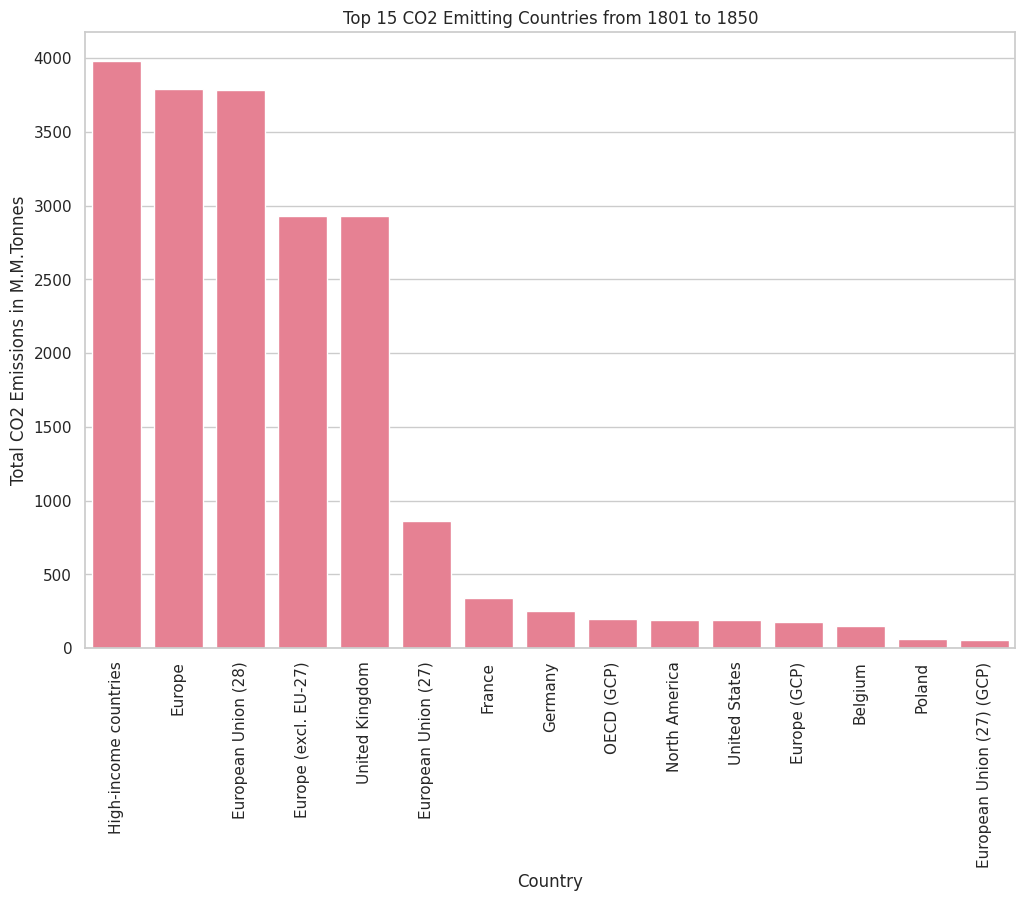

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

top_15_countries = period2.groupby('Country')['Annual CO2 emissions (M.M.tonnes )'].sum().sort_values(ascending=False)[1:16]


plt.figure(figsize=(12, 8))
sns.barplot(x=top_15_countries.index, y=top_15_countries.values)
plt.title('Top 15 CO2 Emitting Countries from 1801 to 1850')
plt.xlabel('Country')
plt.ylabel('Total CO2 Emissions in M.M.Tonnes')
plt.xticks(rotation=90)
plt.show()


#### period 3 from 1851-1900

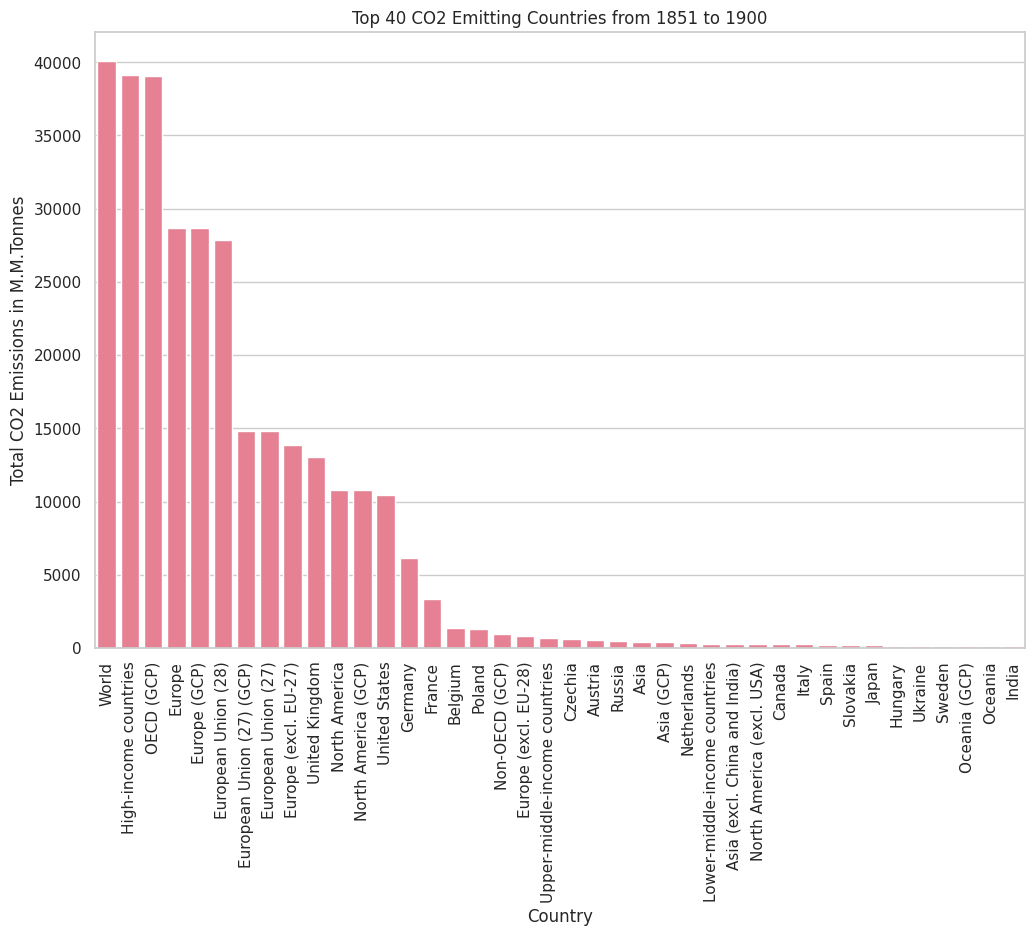

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

top_40_countries = period3.groupby('Country')['Annual CO2 emissions (M.M.tonnes )'].sum().sort_values(ascending=False)[0:40]

plt.figure(figsize=(12, 8))
sns.barplot(x=top_40_countries.index, y=top_40_countries.values)
plt.title('Top 40 CO2 Emitting Countries from 1851 to 1900')
plt.xlabel('Country')
plt.ylabel('Total CO2 Emissions in M.M.Tonnes')
plt.xticks(rotation=90)
plt.show()


#### period 4 from 1901-1950

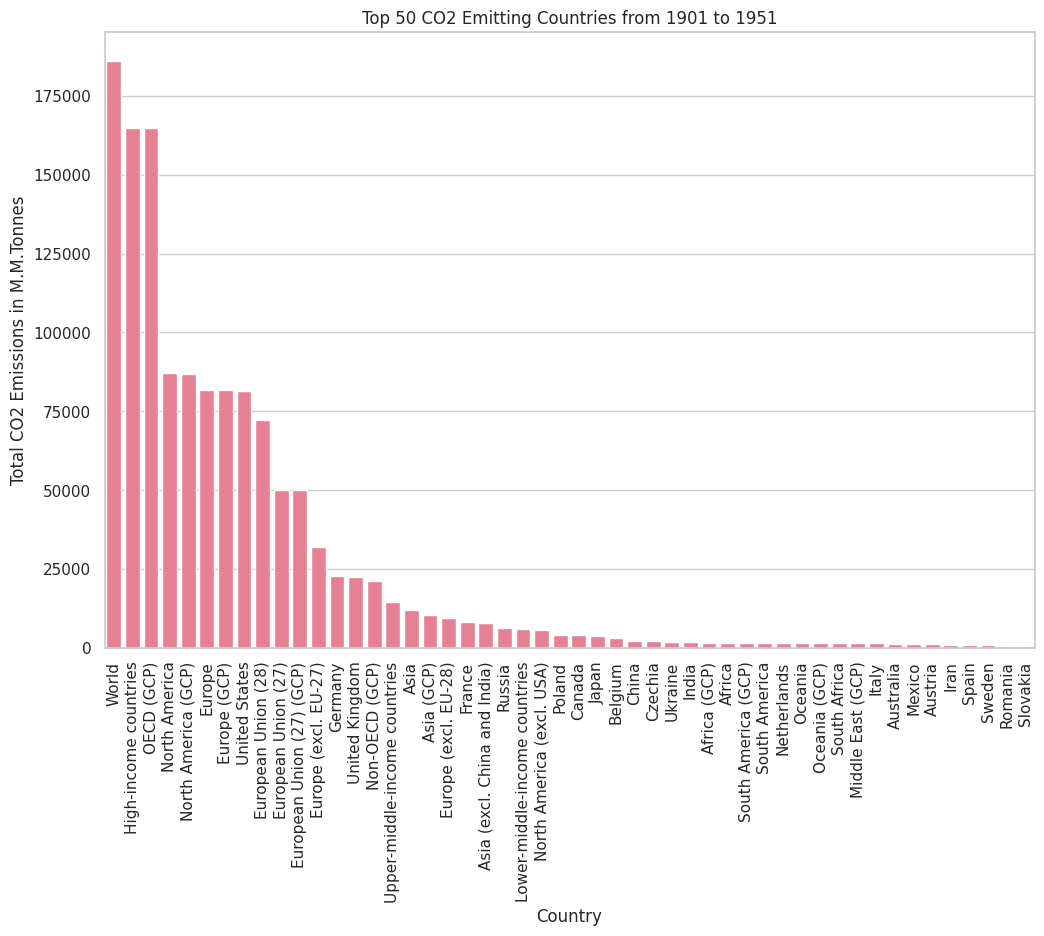

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

top_50_countries = period4.groupby('Country')['Annual CO2 emissions (M.M.tonnes )'].sum().sort_values(ascending=False)[0:50]

plt.figure(figsize=(12, 8))
sns.barplot(x=top_50_countries.index, y=top_50_countries.values)
plt.title('Top 50 CO2 Emitting Countries from 1901 to 1951')
plt.xlabel('Country')
plt.ylabel('Total CO2 Emissions in M.M.Tonnes')
plt.xticks(rotation=90)
plt.show()


#### period 5 from 1951-2000

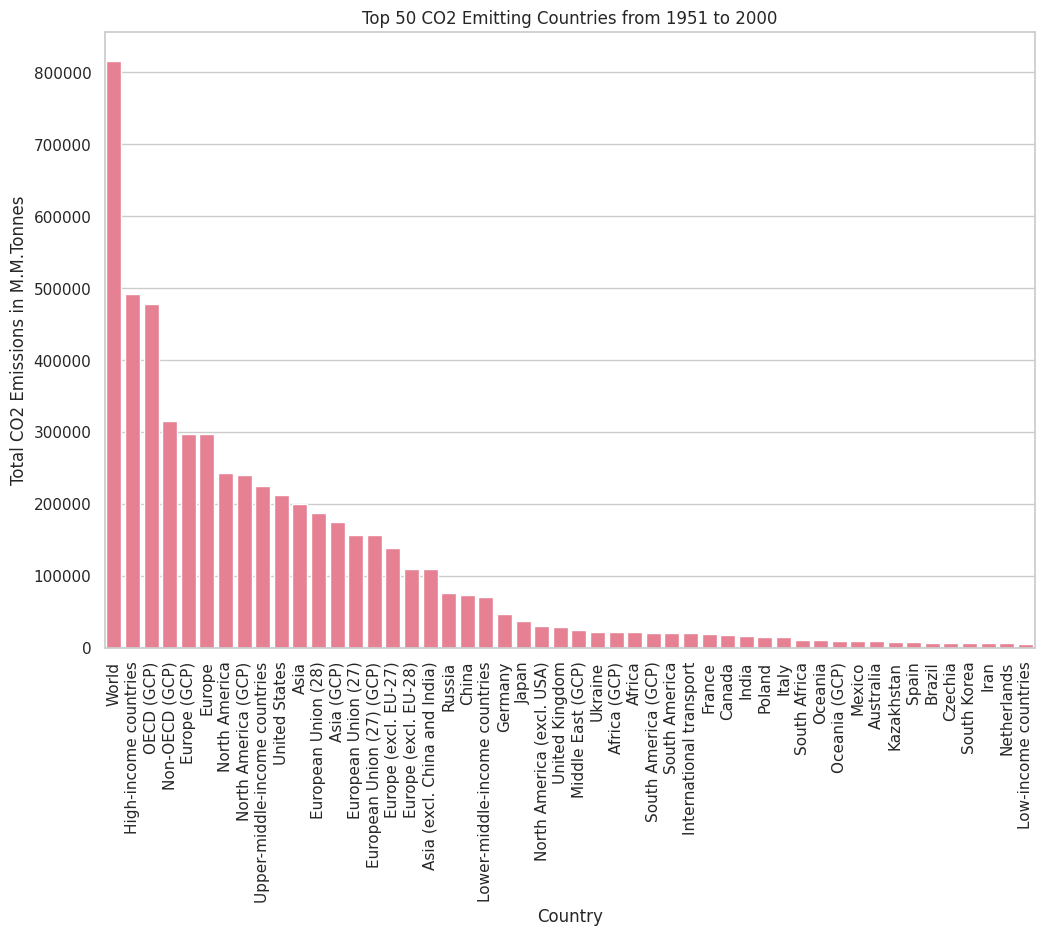

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

top_50_countries = period5.groupby('Country')['Annual CO2 emissions (M.M.tonnes )'].sum().sort_values(ascending=False)[0:50]

plt.figure(figsize=(12, 8))
sns.barplot(x=top_50_countries.index, y=top_50_countries.values)
plt.title('Top 50 CO2 Emitting Countries from 1951 to 2000')
plt.xlabel('Country')
plt.ylabel('Total CO2 Emissions in M.M.Tonnes')
plt.xticks(rotation=90)
plt.show()


#### period 5 from 2001-2021

<ipython-input-51-0a6350d8df8c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_50_countries.values, y=top_50_countries.index, palette="viridis")


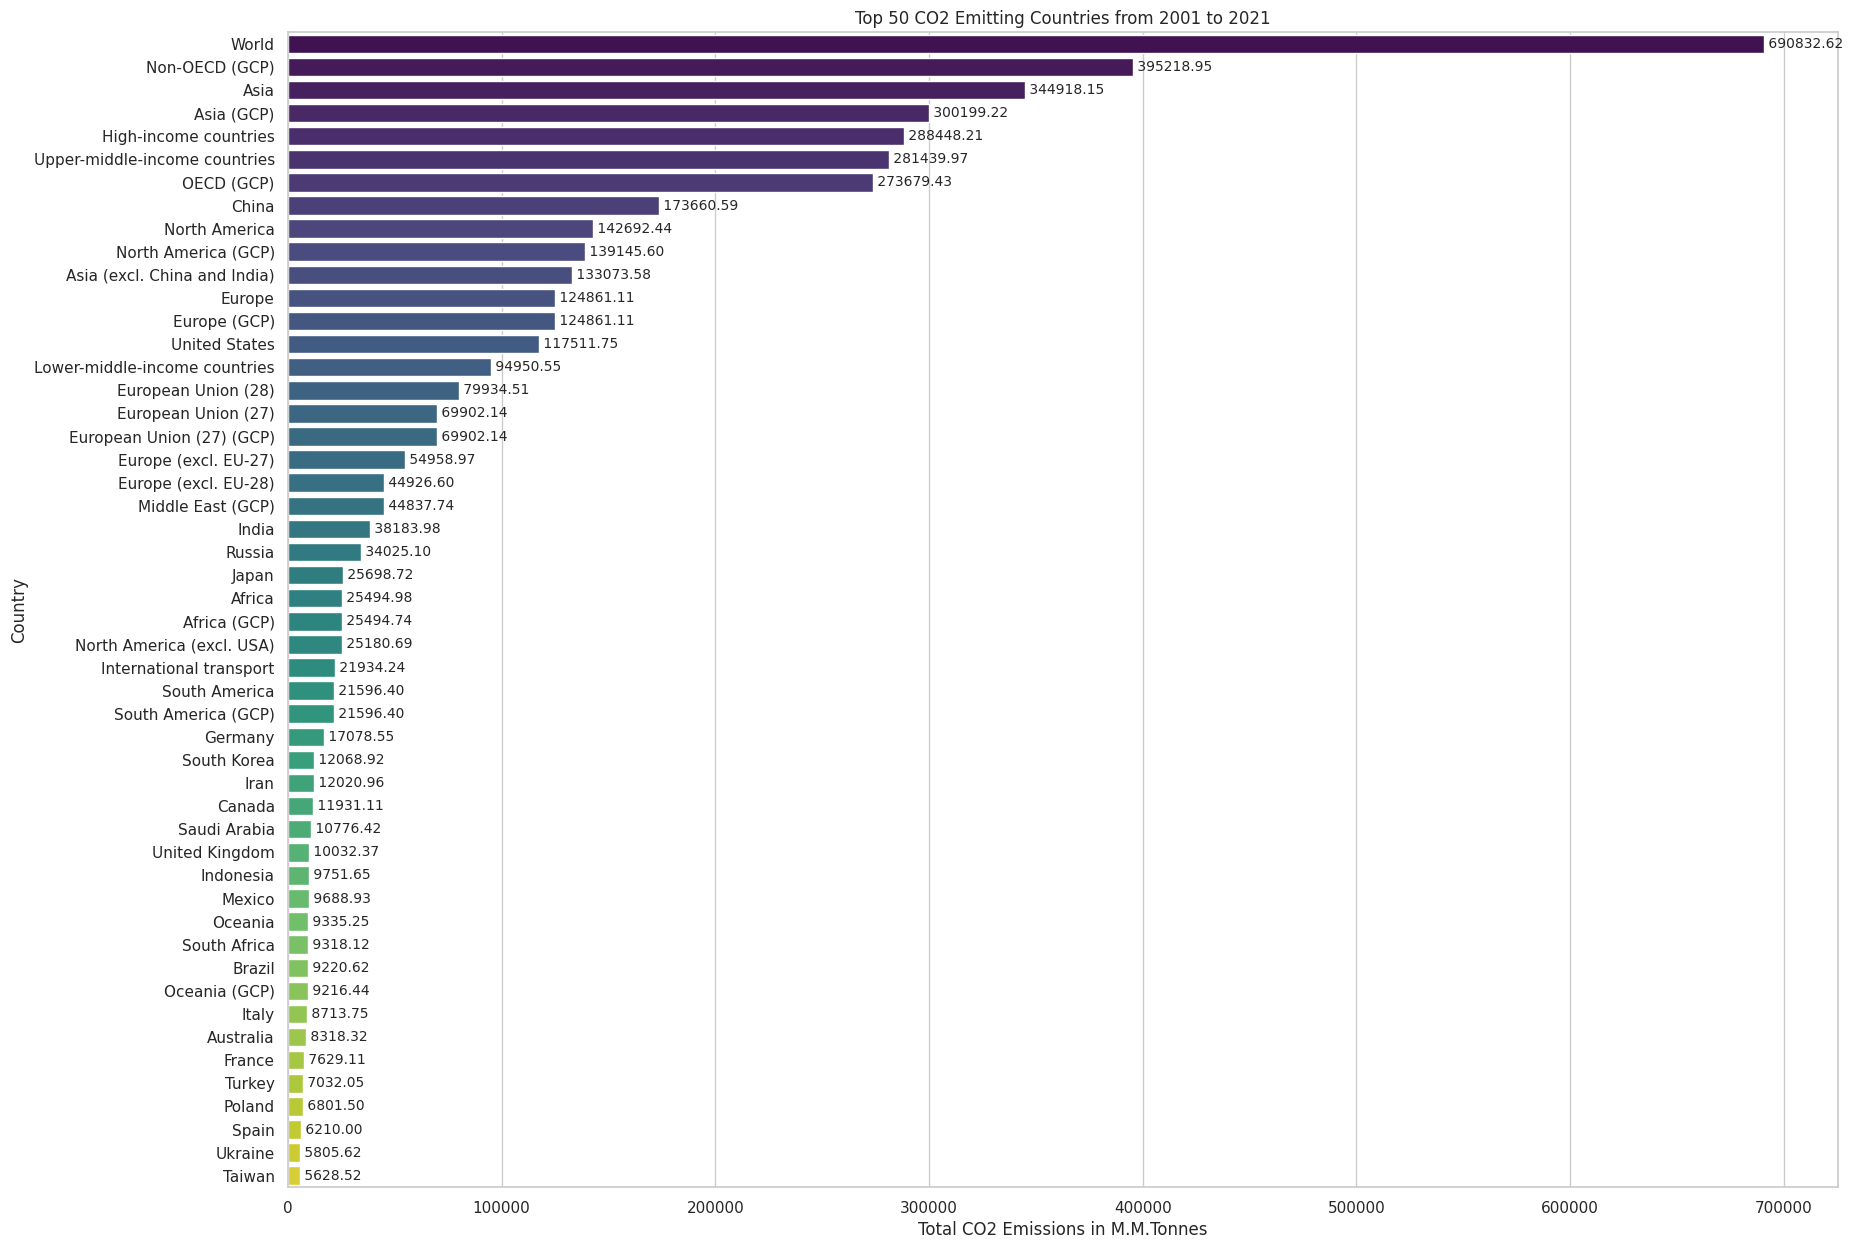

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

top_50_countries = period6.groupby('Country')['Annual CO2 emissions (M.M.tonnes )'].sum().sort_values(ascending=False)[:50]

plt.figure(figsize=(20, 15))
sns.barplot(x=top_50_countries.values, y=top_50_countries.index, palette="viridis")

plt.xlabel('Total CO2 Emissions in M.M.Tonnes')
plt.ylabel('Country')
plt.title('Top 50 CO2 Emitting Countries from 2001 to 2021')

for index, value in enumerate(top_50_countries.values):
    plt.text(value, index, f' {value:.2f}', va='center', fontsize=10)

plt.show()


### Overall

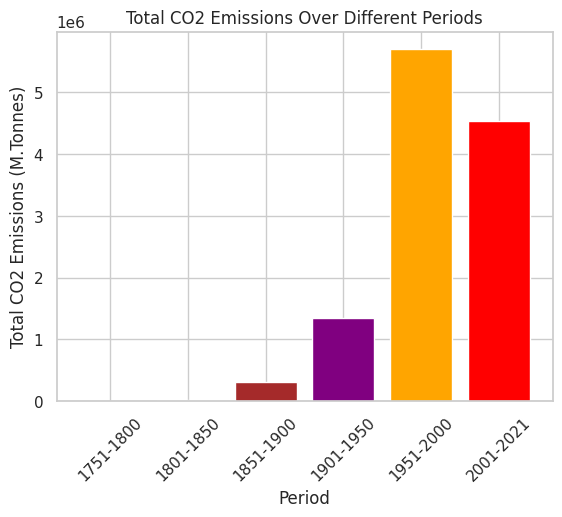

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

dataframes = [period1, period2, period3, period4, period5, period6]
labels = ['1751-1800', '1801-1850', '1851-1900', '1901-1950', '1951-2000', '2001-2021']

co2_sums = [df['Annual CO2 emissions (M.M.tonnes )'].sum() for df in dataframes]

custom_palette = [ 'red', 'blue', 'brown', 'purple', 'orange']

sns.set_palette(custom_palette)

plt.bar(labels, co2_sums, color=custom_palette)
plt.title('Total CO2 Emissions Over Different Periods')
plt.xlabel('Period')
plt.ylabel('Total CO2 Emissions (M.Tonnes)')
plt.xticks(rotation=45)
plt.show()


# We can see from the chart that in 20 years of 21st century the global emissions are more than half of previous centuries

<ipython-input-53-971fc6eaeea0>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Country', y='CO2_Emissions', data=data, palette='Set1')


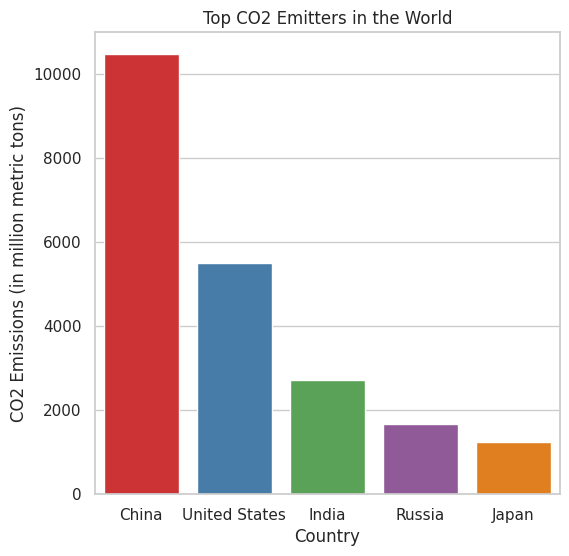

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.DataFrame({
    'Country': ['China', 'United States', 'India', 'Russia', 'Japan'],
    'CO2_Emissions': [10459, 5493, 2716, 1666, 1253]
})

data = data.sort_values(by='CO2_Emissions', ascending=False)

plt.figure(figsize=(6, 6))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x='Country', y='CO2_Emissions', data=data, palette='Set1')

plt.xlabel('Country')
plt.ylabel('CO2 Emissions (in million metric tons)')
plt.title('Top CO2 Emitters in the World')
plt.show()


### Top 5 contributors Trend

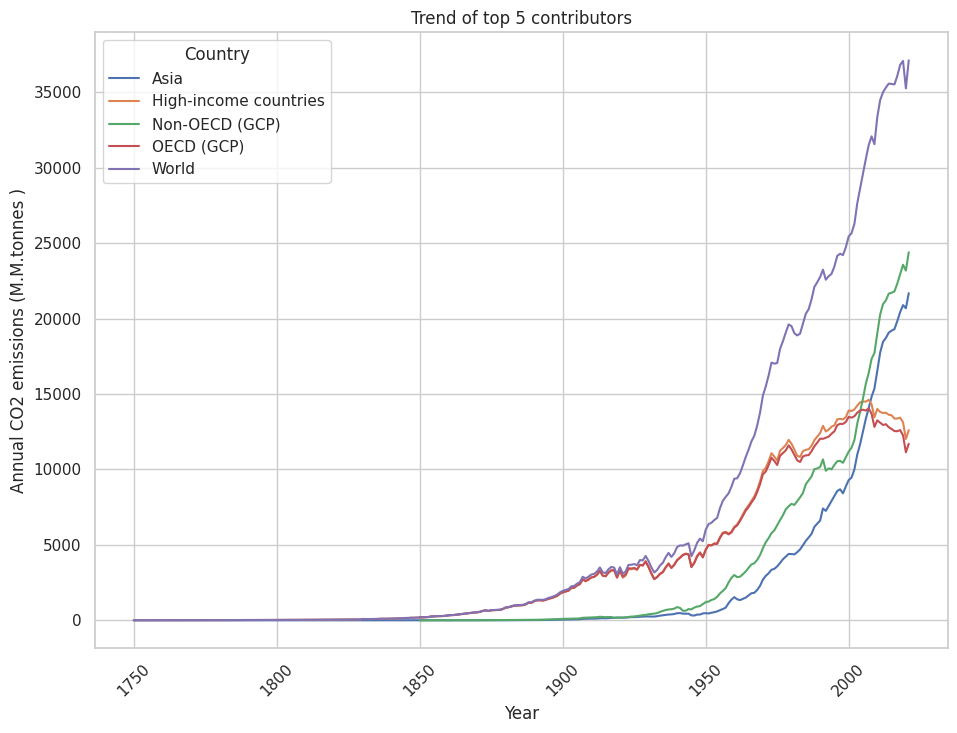

In [54]:
top_5_country=co2.groupby('Country')['Annual CO2 emissions (M.M.tonnes )'].sum().sort_values(ascending=False).head().index
fdata=d=co2[(co2['Country'].isin(top_5_country)) & (co2['Year']!='2021')]
plt.figure(figsize=(11,8))
sns.lineplot(data=fdata,x='Year',y='Annual CO2 emissions (M.M.tonnes )',hue='Country')
plt.title('Trend of top 5 contributors')
plt.xticks(rotation=45)
plt.show()

#**-->Annual CO2 Emission By different Sources.<--**
#**Sources include coal,gas,oil,cement,flaring and others.**

In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
df=pd.read_csv('co2-emissions-by-fuel-line.csv')

In [62]:
df.head()

Entity Code  Year  Annual CO₂ emissions from oil  \
0  Afghanistan  AFG  1949                          0.000   
1  Afghanistan  AFG  1950                      63203.996   
2  Afghanistan  AFG  1951                      65952.000   
3  Afghanistan  AFG  1952                      59892.000   
4  Afghanistan  AFG  1953                      68307.000   

   Annual CO₂ emissions from coal  Annual CO₂ emissions from cement  \
0                       14656.000                               0.0   
1                       21068.000                               0.0   
2                       25648.000                               0.0   
3                       31707.998                               0.0   
4                       37949.000                               0.0   

   Annual CO₂ emissions from gas  Annual CO₂ emissions from flaring  \
0                            0.0                                0.0   
1                            0.0                                0.0   
2                            0.0                                0.0   
3                            0.0                                0.0   
4                            0.0                                0.0   

   Annual CO₂ emissions from other industry  
0                                       NaN  
1                                       NaN  
2                                       NaN  
3                                       NaN  
4                                       NaN

In [63]:
 df.tail()

Entity Code  Year  Annual CO₂ emissions from oil  \
29452  Zimbabwe  ZWE  2017                      3226752.0   
29453  Zimbabwe  ZWE  2018                      4059712.0   
29454  Zimbabwe  ZWE  2019                      3656672.0   
29455  Zimbabwe  ZWE  2020                      3316712.0   
29456  Zimbabwe  ZWE  2021                      3500879.0   

       Annual CO₂ emissions from coal  Annual CO₂ emissions from cement  \
29452                       5900452.0                          468867.0   
29453                       7177776.0                          557990.0   
29454                       6888320.0                          569615.0   
29455                       6721571.0                          569615.0   
29456                       7225620.0                          569615.0   

       Annual CO₂ emissions from gas  Annual CO₂ emissions from flaring  \
29452                            0.0                                0.0   
29453                            0.0                                0.0   
29454                            0.0                                0.0   
29455                            0.0                                0.0   
29456                            0.0                                0.0   

       Annual CO₂ emissions from other industry  
29452                                       NaN  
29453                                       NaN  
29454                                       NaN  
29455                                       NaN  
29456                                       NaN

In [64]:
df.shape

(29457, 9)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29457 entries, 0 to 29456
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Entity                                    29457 non-null  object 
 1   Code                                      24974 non-null  object 
 2   Year                                      29457 non-null  int64  
 3   Annual CO₂ emissions from oil             25042 non-null  float64
 4   Annual CO₂ emissions from coal            25069 non-null  float64
 5   Annual CO₂ emissions from cement          24974 non-null  float64
 6   Annual CO₂ emissions from gas             24943 non-null  float64
 7   Annual CO₂ emissions from flaring         24875 non-null  float64
 8   Annual CO₂ emissions from other industry  2386 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 2.0+ MB


In [66]:
print(df['Annual CO₂ emissions from oil'].isna().sum())
print(df['Annual CO₂ emissions from coal'].isna().sum())
print(df['Annual CO₂ emissions from cement'].isna().sum())
print(df['Annual CO₂ emissions from gas'].isna().sum())
print(df['Annual CO₂ emissions from flaring'].isna().sum())
print(df['Annual CO₂ emissions from other industry'].isna().sum())


4415
4388
4483
4514
4582
27071


In [67]:
'''df['Annual CO₂ emissions from oil'].fillna(0,inplace=True)
df['Annual CO₂ emissions from coal'].fillna(0,inplace=True)
df['Annual CO₂ emissions from cement'].fillna(0,inplace=True)
df['Annual CO₂ emissions from gas'].fillna(0,inplace=True)
df['Annual CO₂ emissions from flaring'].fillna(0,inplace=True)
df['Annual CO₂ emissions from other industry'].fillna(0,inplace=True)'''

"df['Annual CO₂ emissions from oil'].fillna(0,inplace=True)\ndf['Annual CO₂ emissions from coal'].fillna(0,inplace=True)\ndf['Annual CO₂ emissions from cement'].fillna(0,inplace=True)\ndf['Annual CO₂ emissions from gas'].fillna(0,inplace=True)\ndf['Annual CO₂ emissions from flaring'].fillna(0,inplace=True)\ndf['Annual CO₂ emissions from other industry'].fillna(0,inplace=True)"

In [68]:
df.head()

Entity Code  Year  Annual CO₂ emissions from oil  \
0  Afghanistan  AFG  1949                          0.000   
1  Afghanistan  AFG  1950                      63203.996   
2  Afghanistan  AFG  1951                      65952.000   
3  Afghanistan  AFG  1952                      59892.000   
4  Afghanistan  AFG  1953                      68307.000   

   Annual CO₂ emissions from coal  Annual CO₂ emissions from cement  \
0                       14656.000                               0.0   
1                       21068.000                               0.0   
2                       25648.000                               0.0   
3                       31707.998                               0.0   
4                       37949.000                               0.0   

   Annual CO₂ emissions from gas  Annual CO₂ emissions from flaring  \
0                            0.0                                0.0   
1                            0.0                                0.0   
2                            0.0                                0.0   
3                            0.0                                0.0   
4                            0.0                                0.0   

   Annual CO₂ emissions from other industry  
0                                       NaN  
1                                       NaN  
2                                       NaN  
3                                       NaN  
4                                       NaN

# We have data related to all countries

In [69]:
df['Entity'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Asia', 'Asia (excl. China and India)',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'East Timor',
       'Ecuador', 'Egypt', 'El Salvador'

# We have data from 1750 to 2021

In [70]:
df['Year'].unique()

array([1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020, 2021, 1884, 1885, 1886, 1887,
       1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898,
       1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909,
       1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920,
       1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931,
       1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942,
       1943, 1944, 1945, 1946, 1947, 1948, 1750, 1751, 1752, 1753, 1754,
       1755, 1756, 1757, 1758, 1759, 1760, 1761, 17

In [71]:
df['Year'].min()

1750

In [72]:
df['Year'].max()

2021

In [73]:
print(df['Annual CO₂ emissions from oil'].min())
print(df['Annual CO₂ emissions from oil'].max())

0.0
12345653000.0


In [74]:
print(df['Annual CO₂ emissions from coal'].min())
print(df['Annual CO₂ emissions from coal'].max())

0.0
15051513000.0


In [75]:
print(df['Annual CO₂ emissions from cement'].min())
print(df['Annual CO₂ emissions from cement'].max())

0.0
1672592400.0


In [76]:
print(df['Annual CO₂ emissions from gas'].min())
print(df['Annual CO₂ emissions from gas'].max())

0.0
7921829400.0


In [77]:
print(df['Annual CO₂ emissions from flaring'].min())
print(df['Annual CO₂ emissions from flaring'].max())

0.0
439253980.0


In [78]:
print(df['Annual CO₂ emissions from other industry'].min())
print(df['Annual CO₂ emissions from other industry'].max())

0.0
306638600.0


In [79]:
df.groupby('Entity')['Annual CO₂ emissions from oil'].sum().sort_values(ascending=False)

Entity
World                    6.054767e+11
High-income countries    3.566937e+11
North America            1.956772e+11
Asia                     1.615985e+11
United States            1.612750e+11
                             ...     
Niue                     3.019870e+05
Tuvalu                   2.868180e+05
Puerto Rico              2.088480e+05
Antarctica               1.538880e+05
Leeward Islands (GCP)    1.444660e+05
Name: Annual CO₂ emissions from oil, Length: 247, dtype: float64

In [80]:
df.groupby('Entity')['Annual CO₂ emissions from oil'].sum().sort_values(ascending=False)[1:6]

Entity
High-income countries    3.566937e+11
North America            1.956772e+11
Asia                     1.615985e+11
United States            1.612750e+11
Europe                   1.533845e+11
Name: Annual CO₂ emissions from oil, dtype: float64

In [81]:
import warnings
warnings.filterwarnings("ignore")

In [82]:
df.head()

Entity Code  Year  Annual CO₂ emissions from oil  \
0  Afghanistan  AFG  1949                          0.000   
1  Afghanistan  AFG  1950                      63203.996   
2  Afghanistan  AFG  1951                      65952.000   
3  Afghanistan  AFG  1952                      59892.000   
4  Afghanistan  AFG  1953                      68307.000   

   Annual CO₂ emissions from coal  Annual CO₂ emissions from cement  \
0                       14656.000                               0.0   
1                       21068.000                               0.0   
2                       25648.000                               0.0   
3                       31707.998                               0.0   
4                       37949.000                               0.0   

   Annual CO₂ emissions from gas  Annual CO₂ emissions from flaring  \
0                            0.0                                0.0   
1                            0.0                                0.0   
2                            0.0                                0.0   
3                            0.0                                0.0   
4                            0.0                                0.0   

   Annual CO₂ emissions from other industry  
0                                       NaN  
1                                       NaN  
2                                       NaN  
3                                       NaN  
4                                       NaN

In [83]:
df.columns

Index(['Entity', 'Code', 'Year', 'Annual CO₂ emissions from oil',
       'Annual CO₂ emissions from coal', 'Annual CO₂ emissions from cement',
       'Annual CO₂ emissions from gas', 'Annual CO₂ emissions from flaring',
       'Annual CO₂ emissions from other industry'],
      dtype='object')

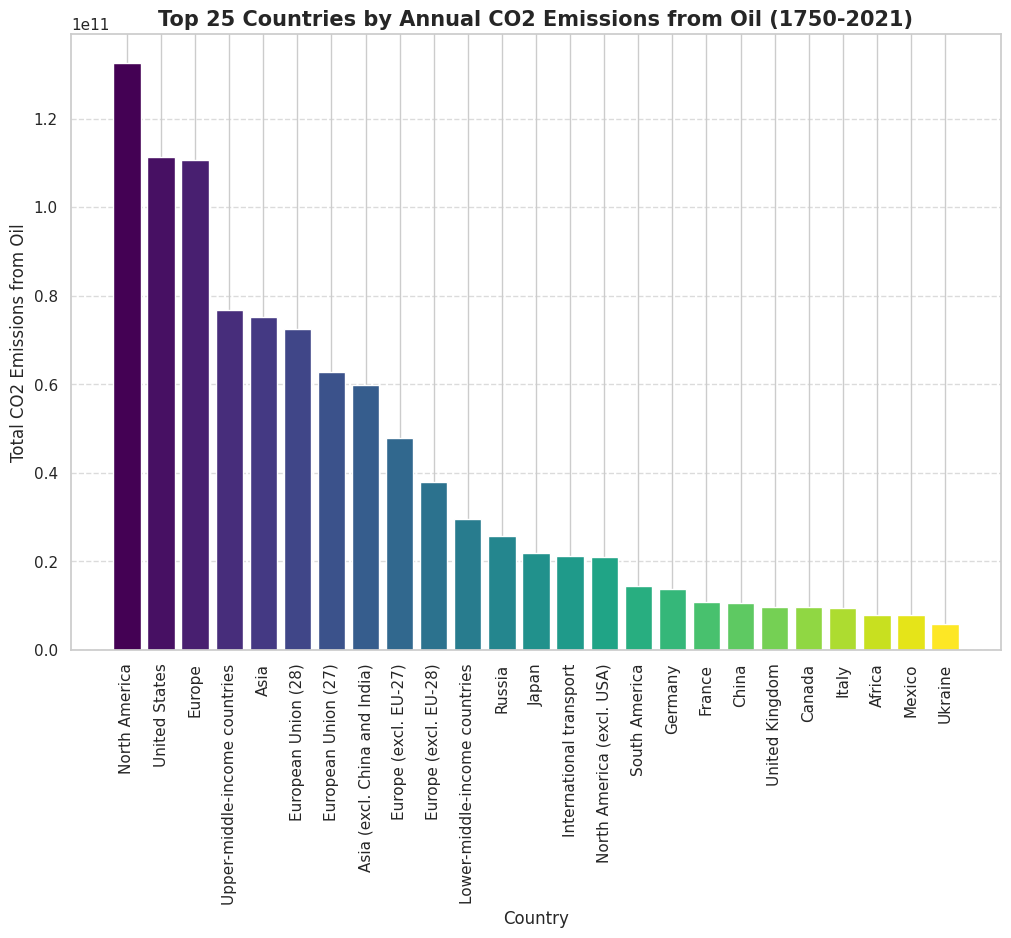

In [84]:
filtered_data = df[(df['Year'] >= 1750) & (df['Year'] <= 2000)]
filtered_data = filtered_data[filtered_data['Entity'] != 'World']
filtered_data = filtered_data[filtered_data['Entity'] != 'High-income countries']
top_25_countries = filtered_data.groupby('Entity')['Annual CO₂ emissions from oil'].sum().nlargest(25)
colors = plt.cm.viridis(np.linspace(0, 1, len(top_25_countries)))
plt.figure(figsize=(12, 8))
plt.bar(top_25_countries.index, top_25_countries.values, color=colors)
plt.title('Top 25 Countries by Annual CO2 Emissions from Oil (1750-2021)', fontsize=15, fontweight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total CO2 Emissions from Oil', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

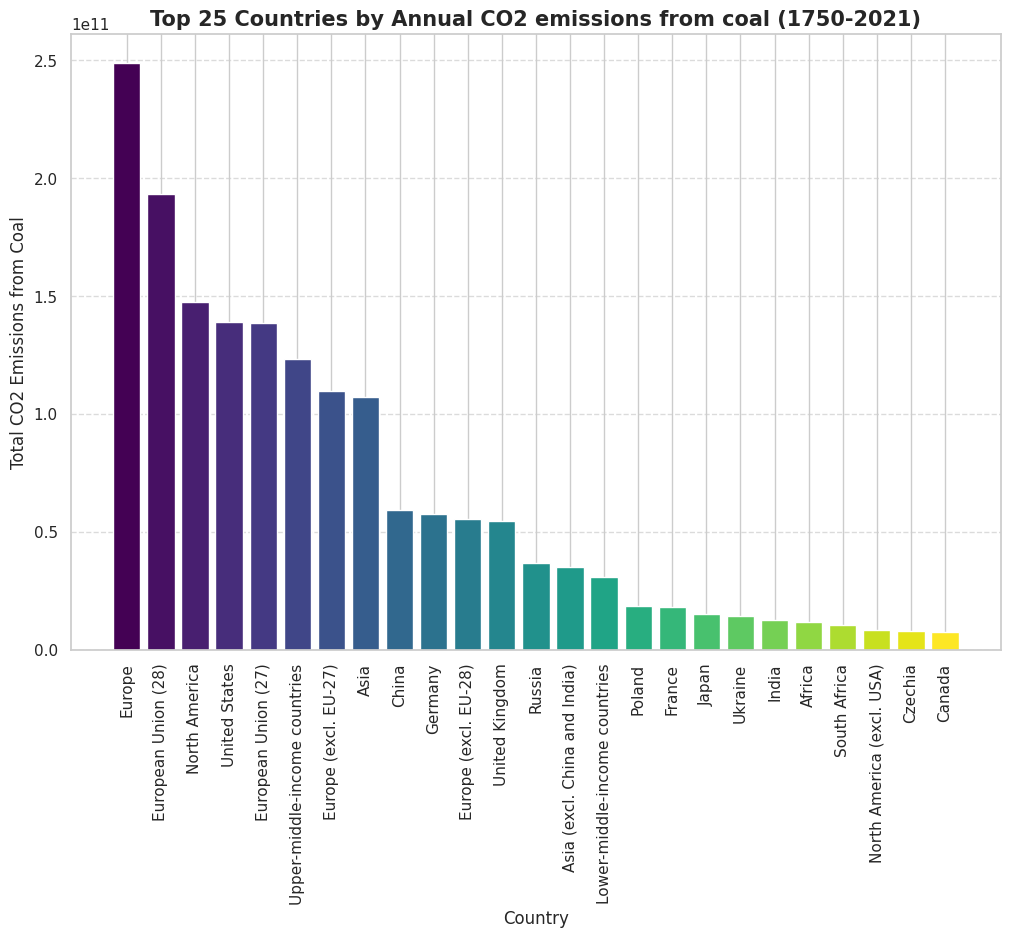

In [85]:
filtered_data = df[(df['Year'] >= 1750) & (df['Year'] <= 2000)]
filtered_data = filtered_data[filtered_data['Entity'] != 'World']
filtered_data = filtered_data[filtered_data['Entity'] != 'High-income countries']
top_25_countries = filtered_data.groupby('Entity')['Annual CO₂ emissions from coal'].sum().nlargest(25)
colors = plt.cm.viridis(np.linspace(0, 1, len(top_25_countries)))
plt.figure(figsize=(12, 8))
plt.bar(top_25_countries.index, top_25_countries.values, color=colors)
plt.title('Top 25 Countries by Annual CO2 emissions from coal (1750-2021)', fontsize=15, fontweight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total CO2 Emissions from Coal', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

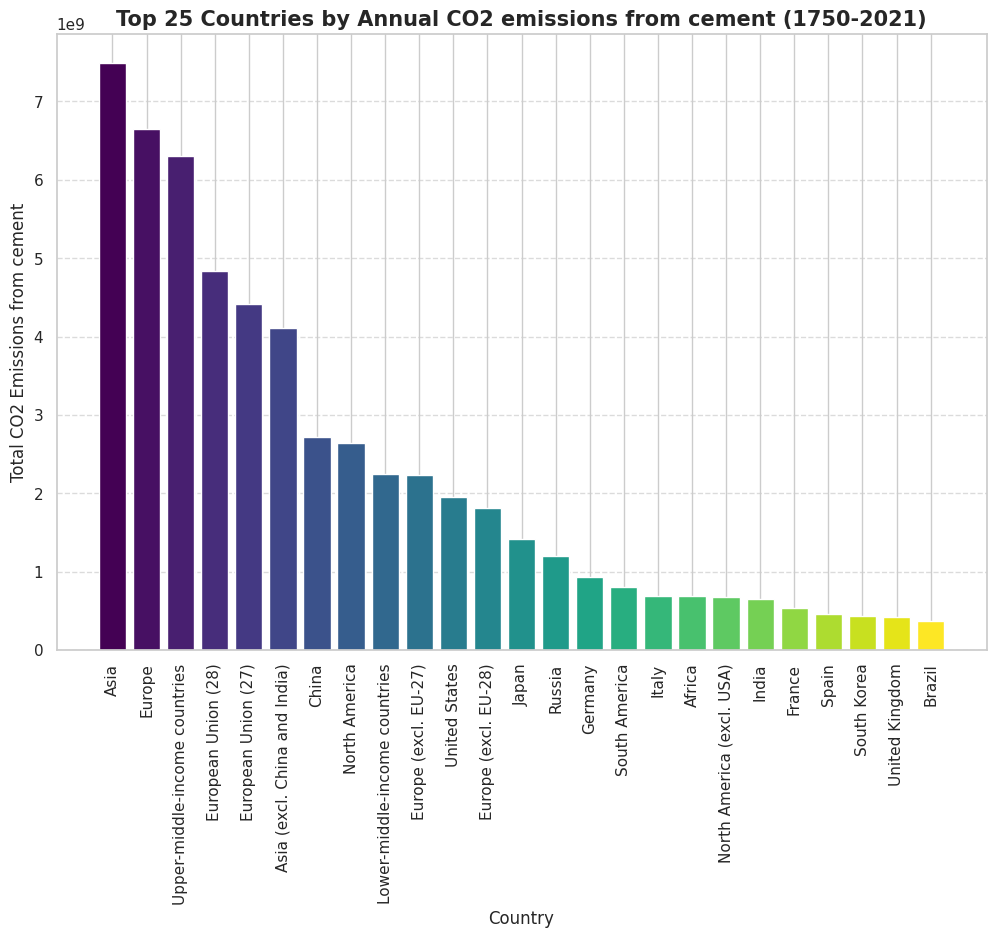

In [86]:
filtered_data = df[(df['Year'] >= 1750) & (df['Year'] <= 2000)]
filtered_data = filtered_data[filtered_data['Entity'] != 'World']
filtered_data = filtered_data[filtered_data['Entity'] != 'High-income countries']
top_25_countries = filtered_data.groupby('Entity')['Annual CO₂ emissions from cement'].sum().nlargest(25)
colors = plt.cm.viridis(np.linspace(0, 1, len(top_25_countries)))
plt.figure(figsize=(12, 8))
plt.bar(top_25_countries.index, top_25_countries.values, color=colors)
plt.title('Top 25 Countries by Annual CO2 emissions from cement (1750-2021)', fontsize=15, fontweight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total CO2 Emissions from cement', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

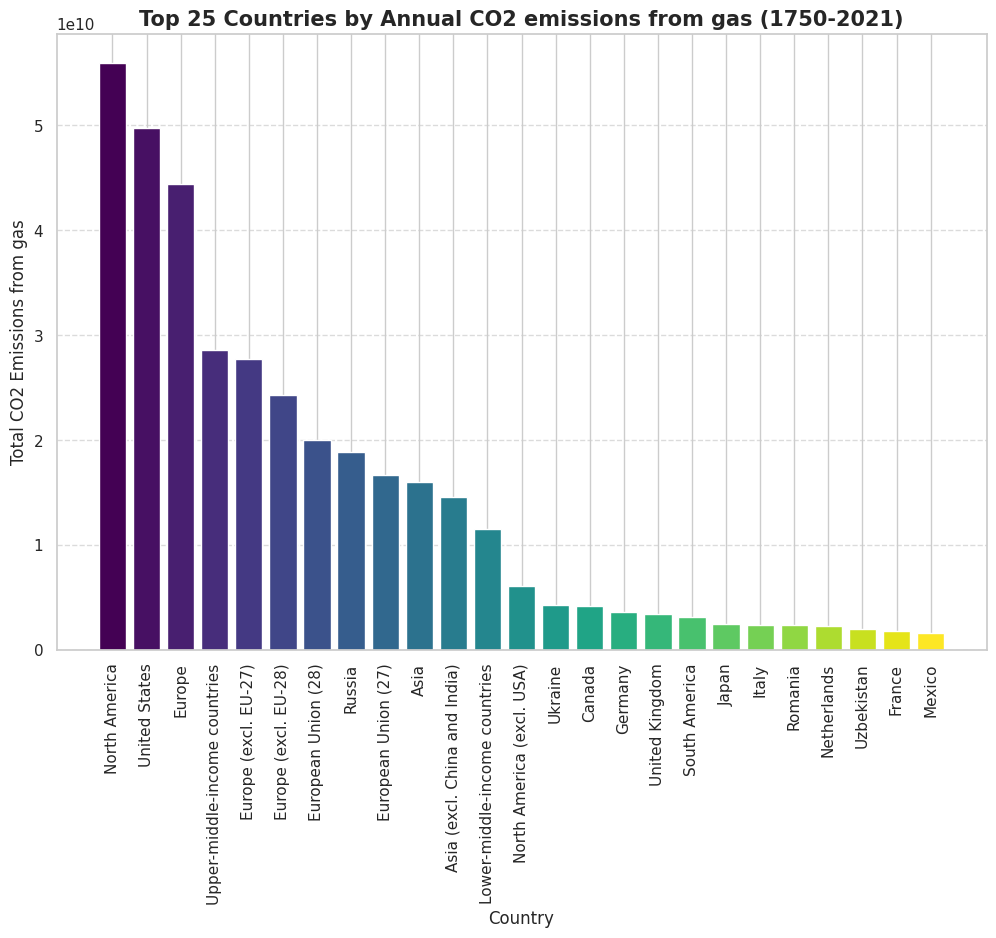

In [87]:
filtered_data = df[(df['Year'] >= 1750) & (df['Year'] <= 2000)]
filtered_data = filtered_data[filtered_data['Entity'] != 'World']
filtered_data = filtered_data[filtered_data['Entity'] != 'High-income countries']
top_25_countries = filtered_data.groupby('Entity')['Annual CO₂ emissions from gas'].sum().nlargest(25)
colors = plt.cm.viridis(np.linspace(0, 1, len(top_25_countries)))
plt.figure(figsize=(12, 8))
plt.bar(top_25_countries.index, top_25_countries.values, color=colors)
plt.title('Top 25 Countries by Annual CO2 emissions from gas (1750-2021)', fontsize=15, fontweight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total CO2 Emissions from gas', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


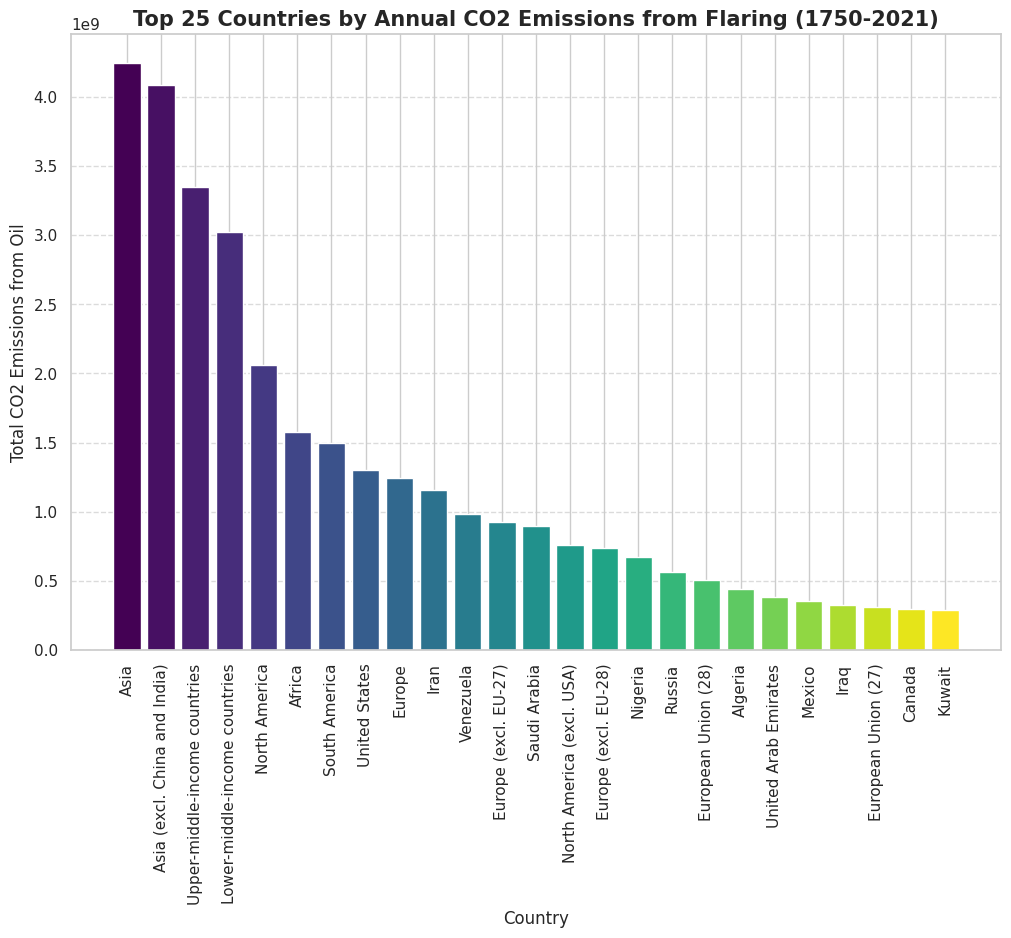

In [88]:
filtered_data = df[(df['Year'] >= 1750) & (df['Year'] <= 2000)]
filtered_data = filtered_data[filtered_data['Entity'] != 'World']
filtered_data = filtered_data[filtered_data['Entity'] != 'High-income countries']
top_25_countries = filtered_data.groupby('Entity')['Annual CO₂ emissions from flaring'].sum().nlargest(25)
colors = plt.cm.viridis(np.linspace(0, 1, len(top_25_countries)))
plt.figure(figsize=(12, 8))
plt.bar(top_25_countries.index, top_25_countries.values, color=colors)
plt.title('Top 25 Countries by Annual CO2 Emissions from Flaring (1750-2021)', fontsize=15, fontweight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total CO2 Emissions from Oil', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#From this we can infer that Asia has contributed more co2 emissions due to flaring and cement production as they are developing and agricultural countires

# North America has contributed more due to OIL and Gas as they had abundance of it.

# Europe contributed more with coal because they were using coal driven systems from 18th to 20th century.

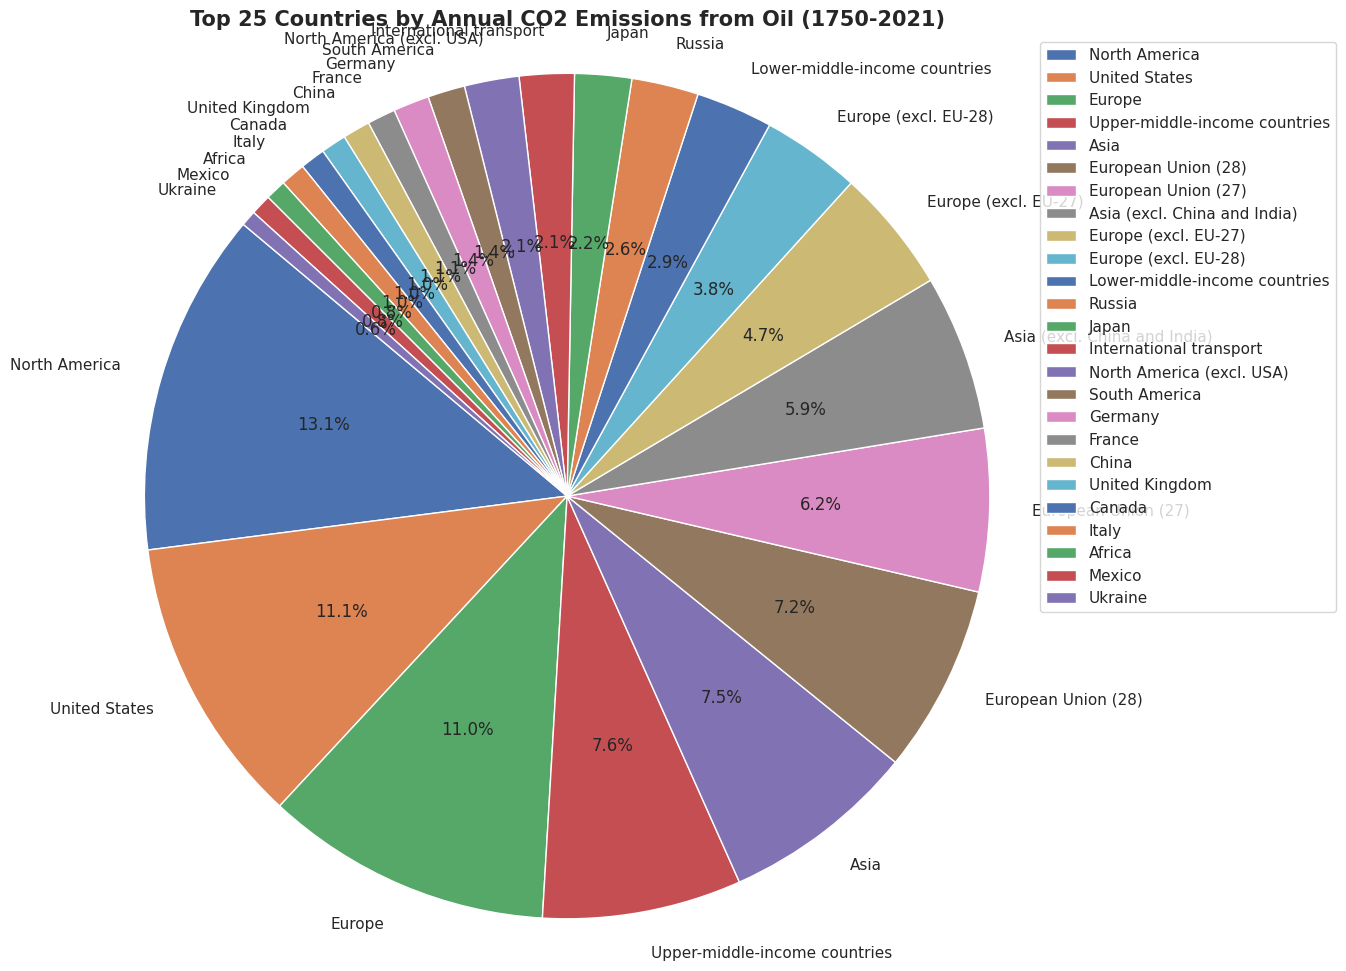

In [89]:
filtered_data = df[(df['Year'] >= 1750) & (df['Year'] <= 2000)]
filtered_data = filtered_data[~filtered_data['Entity'].isin(['World', 'High-income countries'])]
top_25_countries = filtered_data.groupby('Entity')['Annual CO₂ emissions from oil'].sum().nlargest(25)
plt.figure(figsize=(12, 12))
plt.pie(top_25_countries, labels=top_25_countries.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Top 25 Countries by Annual CO2 Emissions from Oil (1750-2021)', fontsize=15, fontweight='bold')
plt.legend(top_25_countries.index, loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()


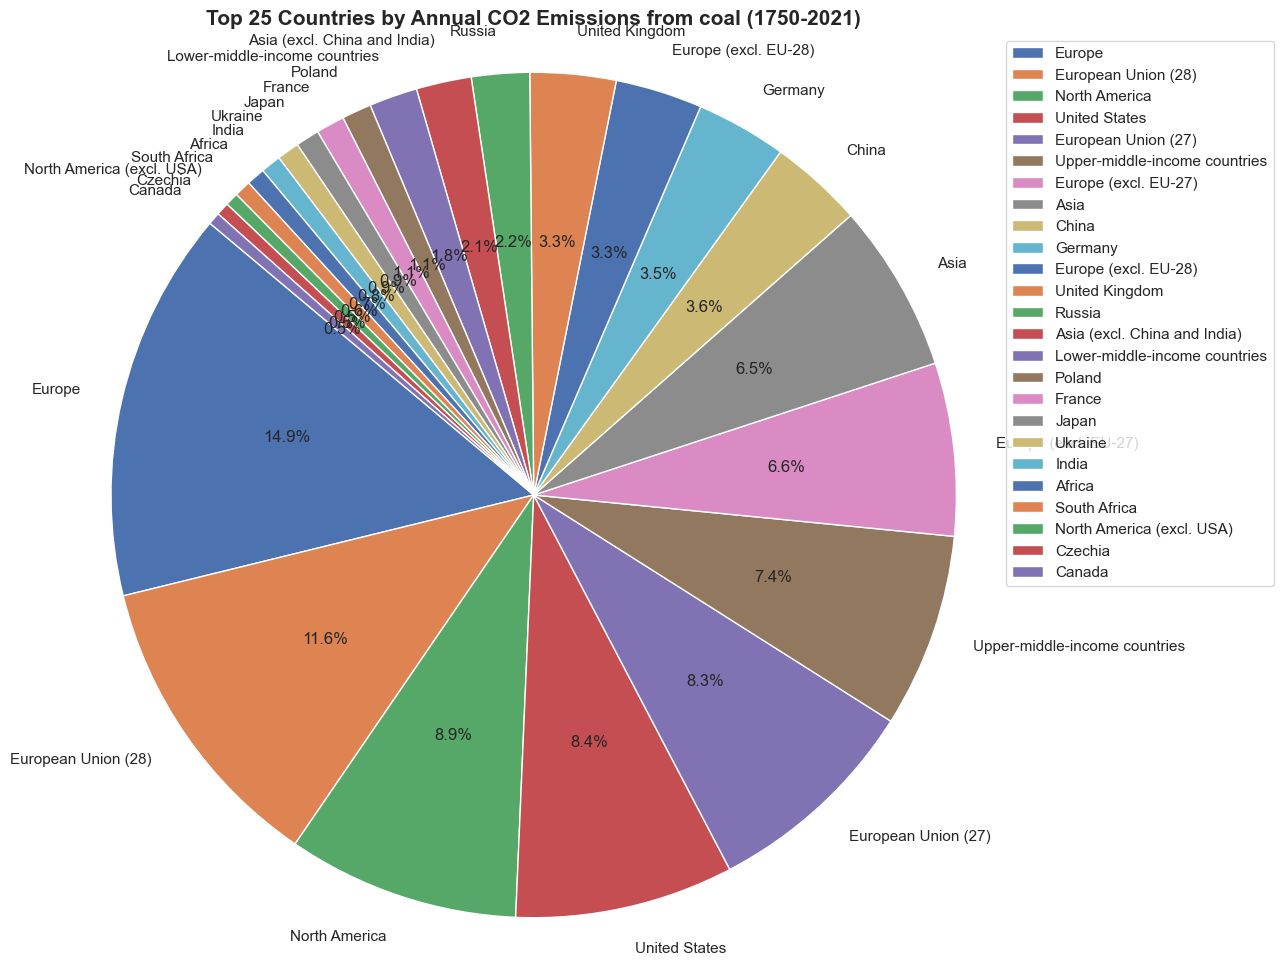

In [ ]:
filtered_data = df[(df['Year'] >= 1750) & (df['Year'] <= 2000)]
filtered_data = filtered_data[~filtered_data['Entity'].isin(['World', 'High-income countries'])]
top_25_countries = filtered_data.groupby('Entity')['Annual CO₂ emissions from coal'].sum().nlargest(25)
plt.figure(figsize=(12, 12))
plt.pie(top_25_countries, labels=top_25_countries.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Top 25 Countries by Annual CO2 Emissions from coal (1750-2021)', fontsize=15, fontweight='bold')
plt.legend(top_25_countries.index, loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

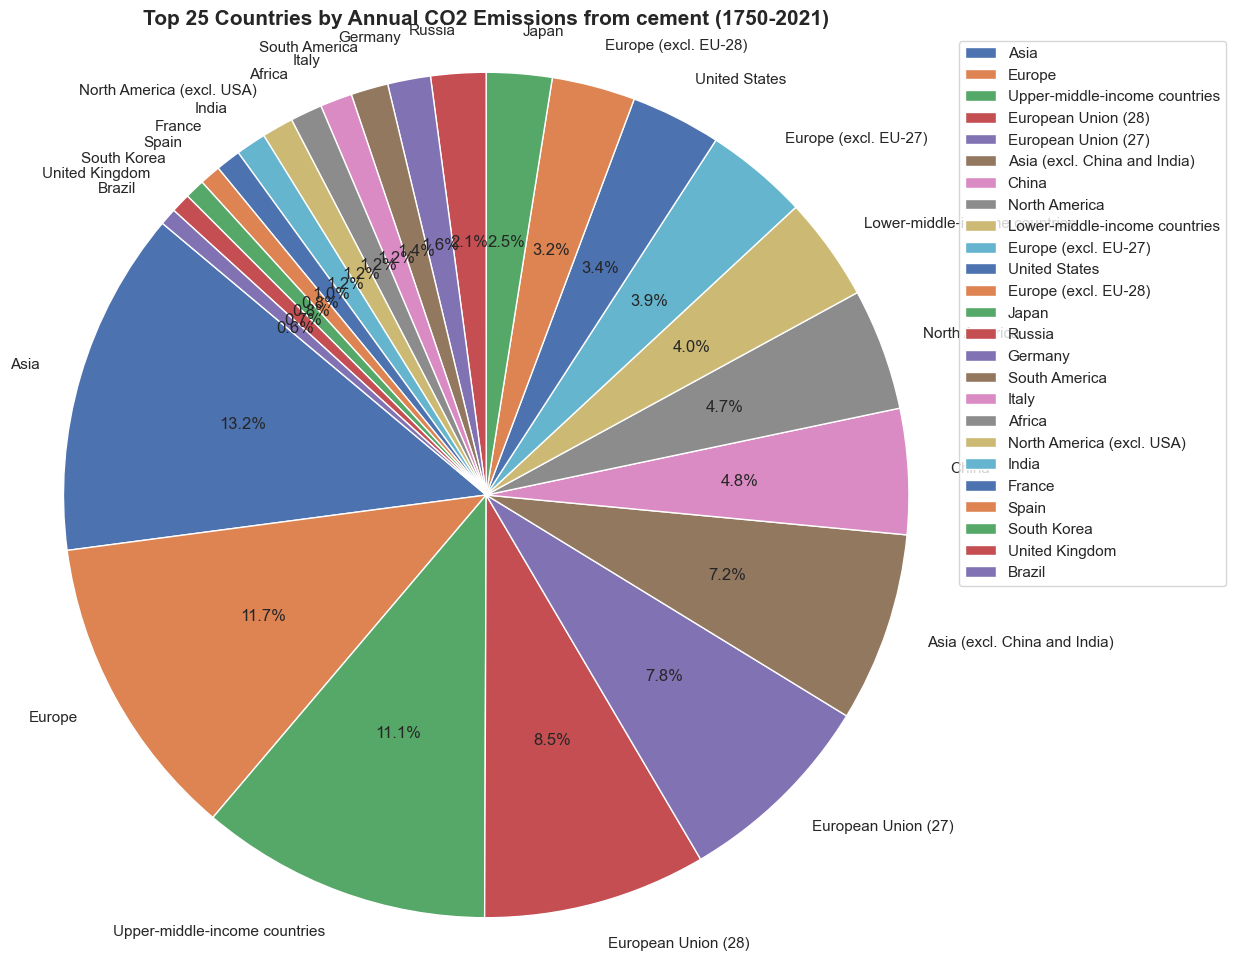

In [ ]:
filtered_data = df[(df['Year'] >= 1750) & (df['Year'] <= 2000)]
filtered_data = filtered_data[~filtered_data['Entity'].isin(['World', 'High-income countries'])]
top_25_countries = filtered_data.groupby('Entity')['Annual CO₂ emissions from cement'].sum().nlargest(25)
plt.figure(figsize=(12, 12))
plt.pie(top_25_countries, labels=top_25_countries.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Top 25 Countries by Annual CO2 Emissions from cement (1750-2021)', fontsize=15, fontweight='bold')
plt.legend(top_25_countries.index, loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

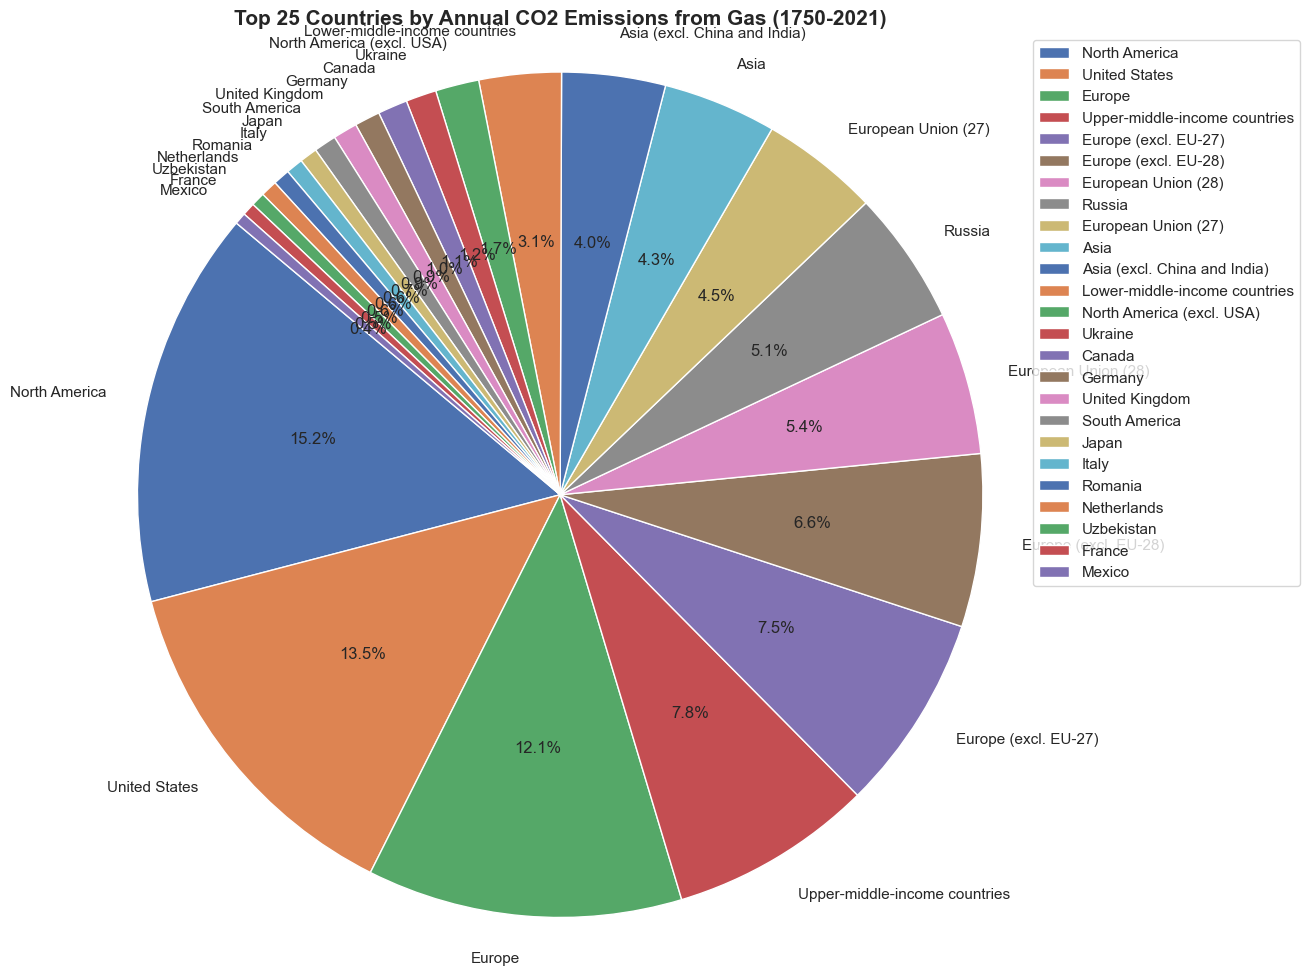

In [ ]:
filtered_data = df[(df['Year'] >= 1750) & (df['Year'] <= 2000)]
filtered_data = filtered_data[~filtered_data['Entity'].isin(['World', 'High-income countries'])]
top_25_countries = filtered_data.groupby('Entity')['Annual CO₂ emissions from gas'].sum().nlargest(25)
plt.figure(figsize=(12, 12))
plt.pie(top_25_countries, labels=top_25_countries.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Top 25 Countries by Annual CO2 Emissions from Gas (1750-2021)', fontsize=15, fontweight='bold')
plt.legend(top_25_countries.index, loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

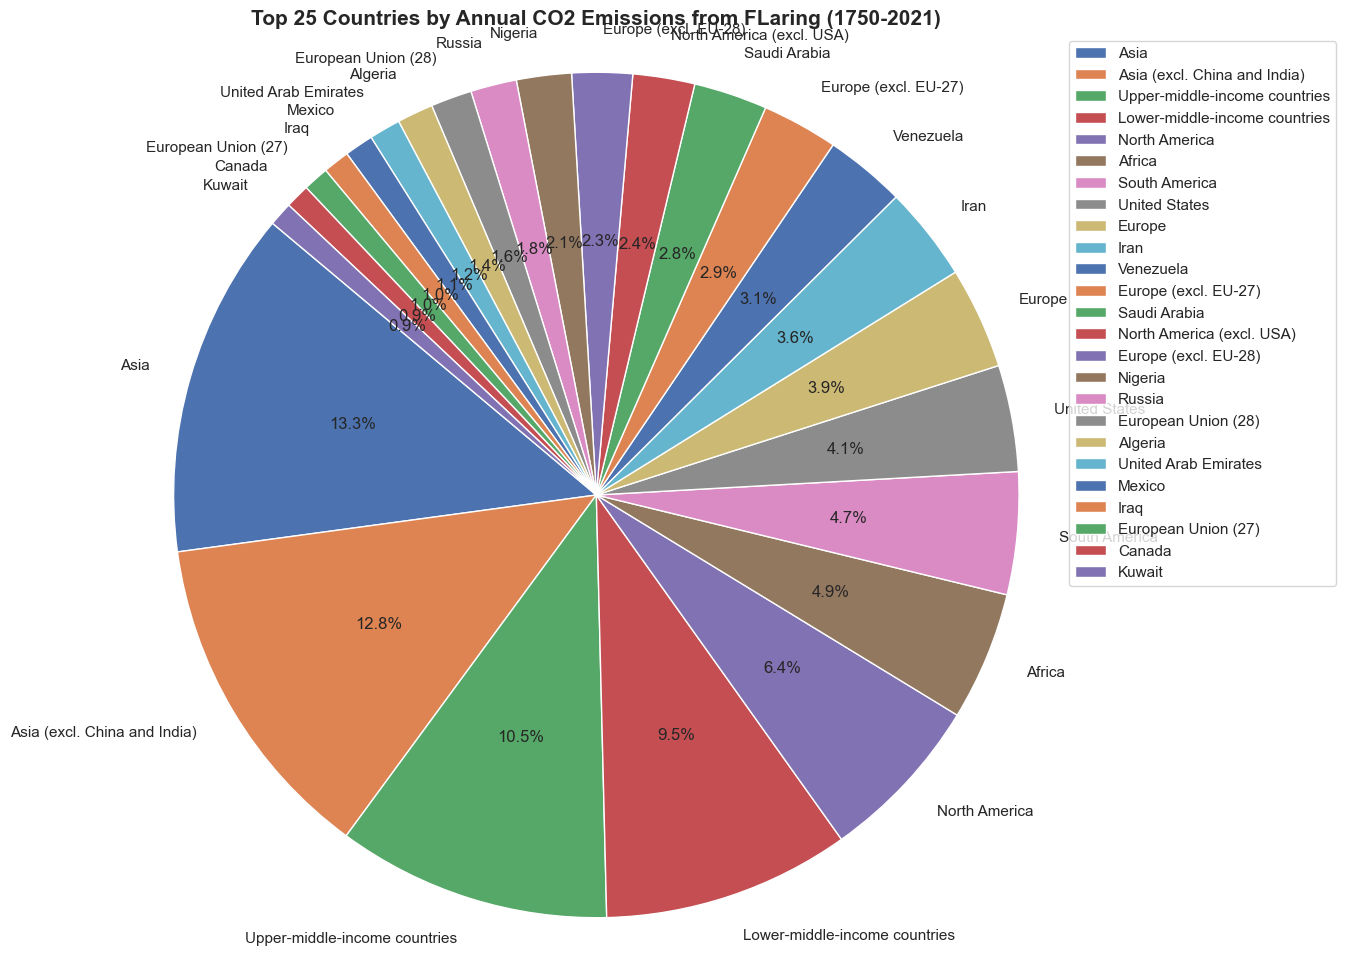

In [ ]:
filtered_data = df[(df['Year'] >= 1750) & (df['Year'] <= 2000)]
filtered_data = filtered_data[~filtered_data['Entity'].isin(['World', 'High-income countries'])]
top_25_countries = filtered_data.groupby('Entity')['Annual CO₂ emissions from flaring'].sum().nlargest(25)
plt.figure(figsize=(12, 12))
plt.pie(top_25_countries, labels=top_25_countries.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Top 25 Countries by Annual CO2 Emissions from FLaring (1750-2021)', fontsize=15, fontweight='bold')
plt.legend(top_25_countries.index, loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

In [ ]:
df.columns

Index(['Entity', 'Code', 'Year', 'Annual CO₂ emissions from oil',
       'Annual CO₂ emissions from coal', 'Annual CO₂ emissions from cement',
       'Annual CO₂ emissions from gas', 'Annual CO₂ emissions from flaring',
       'Annual CO₂ emissions from other industry'],
      dtype='object')

In [91]:
ind=df[df['Entity']=='India']

In [92]:
ind.head(100)

Entity Code  Year  Annual CO₂ emissions from oil  \
12877  India  IND  1858                            0.0   
12878  India  IND  1859                            0.0   
12879  India  IND  1860                            0.0   
12880  India  IND  1861                            0.0   
12881  India  IND  1862                            0.0   
...      ...  ...   ...                            ...   
12972  India  IND  1964                     28121886.0   
12973  India  IND  1965                     30814920.0   
12974  India  IND  1966                     35676370.0   
12975  India  IND  1967                     32697536.0   
12976  India  IND  1968                     42249584.0   

       Annual CO₂ emissions from coal  Annual CO₂ emissions from cement  \
12877                        394488.0                               NaN   
12878                        636486.0                               NaN   
12879                        643116.0                               NaN   
12880                        497254.0                               NaN   
12881                        550295.0                               NaN   
...                               ...                               ...   
12972                     105924380.0                         4943815.0   
12973                     116456230.0                         5397674.0   
12974                     116984060.0                         5569961.0   
12975                     119095736.0                         5820807.0   
12976                     123826280.0                         5872180.0   

       Annual CO₂ emissions from gas  Annual CO₂ emissions from flaring  \
12877                            0.0                                0.0   
12878                            0.0                                0.0   
12879                            0.0                                0.0   
12880                            0.0                                0.0   
12881                            0.0                                0.0   
...                              ...                                ...   
12972                        21985.0                           476332.0   
12973                       282134.0                           751137.0   
12974                       311440.0                           831728.0   
12975                       487312.0                          1454608.0   
12976                       751120.0                          1370336.0   

       Annual CO₂ emissions from other industry  
12877                                       NaN  
12878                                       NaN  
12879                                       NaN  
12880                                       NaN  
12881                                       NaN  
...                                         ...  
12972                                       NaN  
12973                                       NaN  
12974                                       NaN  
12975                                       NaN  
12976                                       NaN  

[100 rows x 9 columns]

# Apply linear regression mode

In [93]:
ind.fillna(0,inplace=True)

In [94]:
from sklearn.linear_model import LinearRegression

# Predicting co2 emissions from oil,coal,cement,gas,flaring

In [95]:
from sklearn.linear_model import LinearRegression

# Assuming 'ind' is your DataFrame
x = ind['Year'].values.reshape(-1, 1)
y = ind['Annual CO₂ emissions from oil'].values

model = LinearRegression()
model.fit(x, y)

# Input for the year to predict
t = int(input("Enter Year to predict: "))

year_to_predict = [[t]]  # Reshape input for prediction

# Predict the emissions
predicted_oil = model.predict(year_to_predict)

print('The predicted value of emissions from oil (in million metric tons) is:')
print(predicted_oil[0] / 1000000)


Enter Year to predict: 2023
The predicted value of emissions from oil (in million metric tons) is:
317.1375123341465


In [96]:
#From coal
x = ind['Year'].values.reshape(-1, 1)
y = ind['Annual CO₂ emissions from coal']
model = LinearRegression()

model.fit(x, y)
t=int(input("Enter Year to predict: "))
year_to_predict =t
predicted_coal = model.predict([[year_to_predict]])
print('The predicted value of emissions from coal(in million metric tons)is:')
print(predicted_coal/1000000)

Enter Year to predict: 2023
The predicted value of emissions from coal(in million metric tons)is:
[762.44241013]


In [97]:
#From cement
x = ind['Year'].values.reshape(-1, 1)
y = ind['Annual CO₂ emissions from cement']
model = LinearRegression()
model.fit(x, y)
t=int(input("Enter Year to predict: "))
year_to_predict =t
predicted_cement = model.predict([[year_to_predict]])
print('The predicted value of emissions from cement(in million metric tons)is:')
print(predicted_cement/1000000)

Enter Year to predict: 2025
The predicted value of emissions from cement(in million metric tons)is:
[58.98558507]


In [98]:
#from gas
x = ind['Year'].values.reshape(-1, 1)
y = ind['Annual CO₂ emissions from gas']
model = LinearRegression()
model.fit(x, y)
t=int(input("Enter Year to predict: "))
year_to_predict =t
predicted_gas = model.predict([[year_to_predict]])
print('The predicted value of emissions from gas (in million metric tons)is:')
print(predicted_gas/1000000)

Enter Year to predict: 2045
The predicted value of emissions from gas (in million metric tons)is:
[67.74360728]


In [99]:
#from flaring
x = ind['Year'].values.reshape(-1, 1)
y = ind['Annual CO₂ emissions from flaring']
model = LinearRegression()
model.fit(x, y)
t=int(input("Enter Year to predict: "))
year_to_predict =t
predicted_flaring = model.predict([[year_to_predict]])
print('The predicted value of emissions from flaring (in million metric tons)is:')
print(predicted_flaring/1000000)

Enter Year to predict: 2023
The predicted value of emissions from flaring (in million metric tons)is:
[3.45845145]


# Random forest

In [100]:
#from oil
from sklearn.ensemble import RandomForestRegressor
x = ind['Year'].values.reshape(-1, 1)
y = ind['Annual CO₂ emissions from oil']
model = RandomForestRegressor(n_estimators=101, random_state=42)
model.fit(x, y)
t=int(input("Enter Year to predict:"))
year_to_predict = t
predicted_oil = model.predict([[year_to_predict]])
print('The predicted value of co2 emissions from oil in(in million metric tons) is:')
print(predicted_oil/1000000)

Enter Year to predict:2029
The predicted value of co2 emissions from oil in(in million metric tons) is:
[622.26557109]


In [101]:
#From coal
x = ind['Year'].values.reshape(-1, 1)
y = ind['Annual CO₂ emissions from coal']
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x, y)
t=int(input("Enter Year to predict:"))
year_to_predict = t
predicted_coal = model.predict([[year_to_predict]])
print('The predicted value of co2 emissions from coal in(in million metric tons) is:')
print(predicted_coal/1000000)

Enter Year to predict:2024
The predicted value of co2 emissions from coal in(in million metric tons) is:
[1743.375054]


In [102]:
#From cement
x = ind['Year'].values.reshape(-1, 1)
y = ind['Annual CO₂ emissions from cement']
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x, y)
t=int(input("Enter Year to predict:"))
year_to_predict = t
predicted_cement = model.predict([[year_to_predict]])
print('The predicted value of co2 emissions from cement in(in million metric tons) is:')
print(predicted_cement/100000)

Enter Year to predict:2026
The predicted value of co2 emissions from cement in(in million metric tons) is:
[1426.43193]


In [103]:
#From gas
x = ind['Year'].values.reshape(-1, 1)
y = ind['Annual CO₂ emissions from gas']
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x, y)
t=int(input("Enter Year to predict:"))
year_to_predict = t
predicted_coal = model.predict([[year_to_predict]])
print('The predicted value of co2 emissions from gas in(in million metric tons) is:')
print(predicted_gas/1000000)

Enter Year to predict:2029
The predicted value of co2 emissions from gas in(in million metric tons) is:
[67.74360728]


# A case study on sweden

In [123]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [124]:
sw=pd.read_csv('co2-emissions-and-gdp.csv')

In [125]:
sw.head()

Entity Code  Year  GDP, PPP (constant 2017 international $)  \
0  Afghanistan  AFG  1990                                       NaN   
1  Afghanistan  AFG  1991                                       NaN   
2  Afghanistan  AFG  1992                                       NaN   
3  Afghanistan  AFG  1993                                       NaN   
4  Afghanistan  AFG  1994                                       NaN   

   Annual CO₂ emissions  Annual consumption-based CO₂ emissions  
0             2024326.1                                     NaN  
1             1914301.0                                     NaN  
2             1482054.0                                     NaN  
3             1486943.0                                     NaN  
4             1453829.0                                     NaN

In [126]:
sw.tail()

Entity Code  Year  GDP, PPP (constant 2017 international $)  \
8248  Zimbabwe  ZWE  2017                              3.439634e+10   
8249  Zimbabwe  ZWE  2018                              3.611954e+10   
8250  Zimbabwe  ZWE  2019                              3.383229e+10   
8251  Zimbabwe  ZWE  2020                              3.118764e+10   
8252  Zimbabwe  ZWE  2021                              3.382862e+10   

      Annual CO₂ emissions  Annual consumption-based CO₂ emissions  
8248             9596071.0                              10506379.0  
8249            11795478.0                              12566587.0  
8250            11114607.0                              12092144.0  
8251            10607897.0                              11613618.0  
8252            11296114.0                                     NaN

In [127]:
sw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8253 entries, 0 to 8252
Data columns (total 6 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Entity                                    8253 non-null   object 
 1   Code                                      7100 non-null   object 
 2   Year                                      8253 non-null   int64  
 3   GDP, PPP (constant 2017 international $)  6346 non-null   float64
 4   Annual CO₂ emissions                      7919 non-null   float64
 5   Annual consumption-based CO₂ emissions    4600 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 387.0+ KB


In [128]:
sw.shape

(8253, 6)

In [129]:
sw=sw[sw['Entity']=='Sweden']

In [ ]:
sw.head()

In [130]:
sw=sw[sw['Entity']=='Sweden']

In [131]:
sw.head()

Entity Code  Year  GDP, PPP (constant 2017 international $)  \
7261  Sweden  SWE  1990                              2.923426e+11   
7262  Sweden  SWE  1991                              2.889924e+11   
7263  Sweden  SWE  1992                              2.856442e+11   
7264  Sweden  SWE  1993                              2.797439e+11   
7265  Sweden  SWE  1994                              2.907377e+11   

      Annual CO₂ emissions  Annual consumption-based CO₂ emissions  
7261            57580090.0                              85608850.0  
7262            57950550.0                              84809230.0  
7263            57688900.0                              93701736.0  
7264            57725988.0                              87152530.0  
7265            60186576.0                              86360270.0

In [132]:
sw.tail()

Entity Code  Year  GDP, PPP (constant 2017 international $)  \
7288  Sweden  SWE  2017                              5.224768e+11   
7289  Sweden  SWE  2018                              5.326652e+11   
7290  Sweden  SWE  2019                              5.432450e+11   
7291  Sweden  SWE  2020                              5.314554e+11   
7292  Sweden  SWE  2021                              5.584273e+11   

      Annual CO₂ emissions  Annual consumption-based CO₂ emissions  
7288            42704240.0                              72561464.0  
7289            42094908.0                              72802590.0  
7290            40982492.0                              68871920.0  
7291            36515104.0                              61549804.0  
7292            35848948.0                                     NaN

In [133]:
sw['Year'].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

In [134]:
print(sw['Year'].min())
print(sw['Year'].max())

1990
2021


In [135]:
print(sw['GDP, PPP (constant 2017 international $)'].isna().sum())

0


In [136]:
print(sw['Annual CO₂ emissions'].isna().sum())

0


In [137]:

print(sw['Annual consumption-based CO₂ emissions'].isna().sum())

1


# Bar plot


# Sweden's GDP PPP increased over the years.

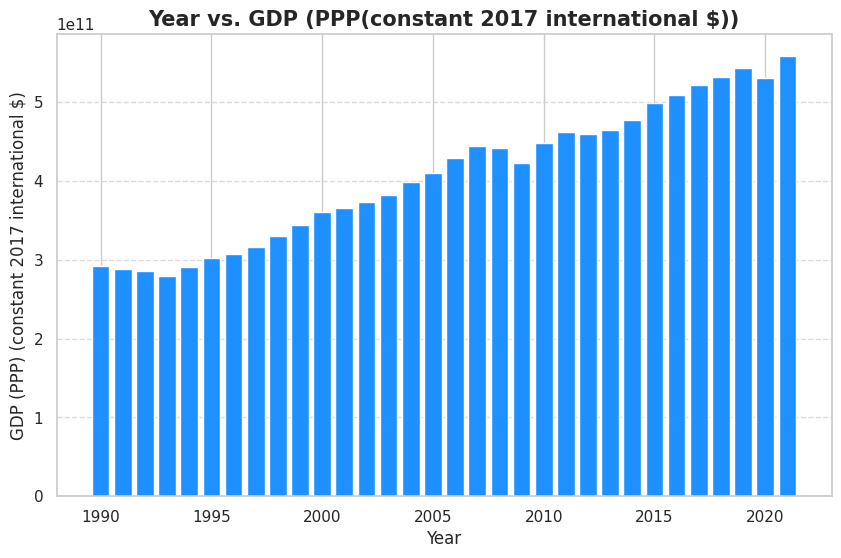

In [120]:
plt.figure(figsize=(10, 6))
plt.bar(sw['Year'], sw['GDP, PPP (constant 2017 international $)'], color='dodgerblue')
plt.title('Year vs. GDP (PPP(constant 2017 international $))', fontsize=15, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP (PPP) (constant 2017 international $)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# And their carbon emissiond reduced

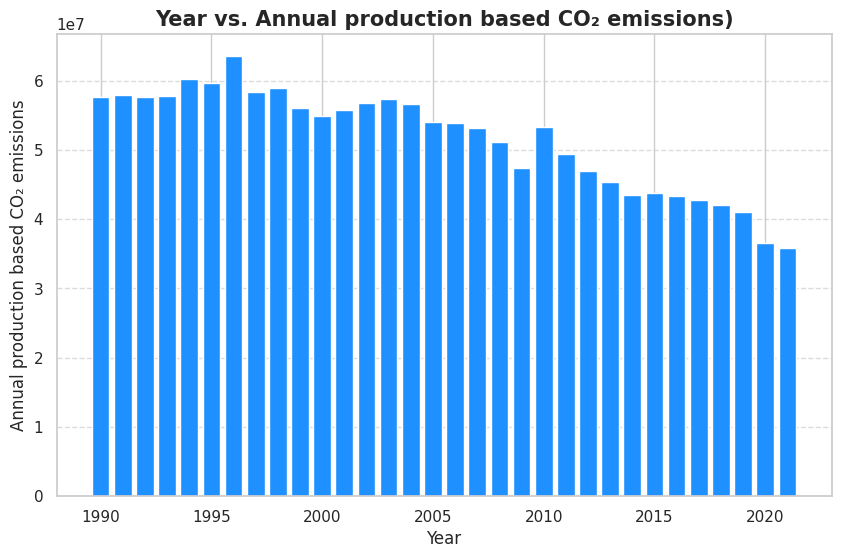

In [138]:
plt.figure(figsize=(10, 6))
plt.bar(sw['Year'], sw['Annual CO₂ emissions'], color='dodgerblue')
plt.title('Year vs. Annual production based CO₂ emissions)', fontsize=15, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Annual production based CO₂ emissions', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

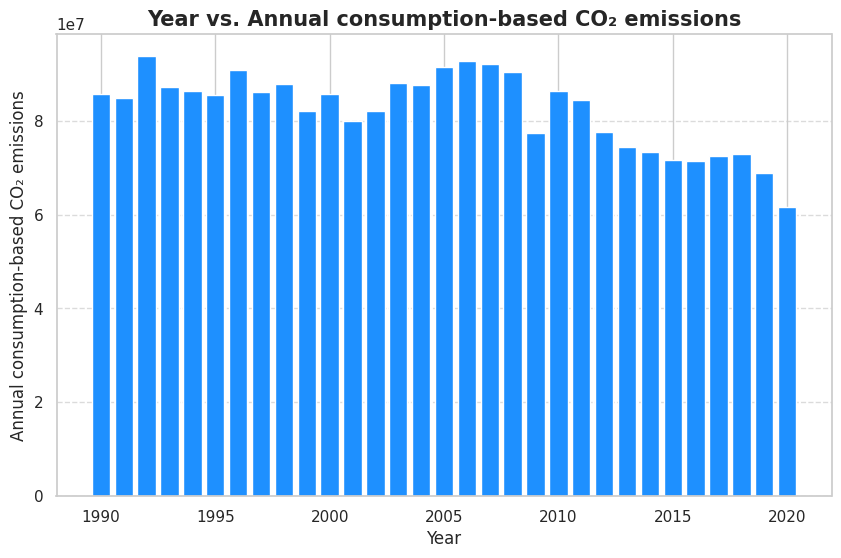

In [140]:
plt.figure(figsize=(10, 6))
plt.bar(sw['Year'], sw['Annual consumption-based CO₂ emissions'], color='dodgerblue')
plt.title('Year vs. Annual consumption-based CO₂ emissions', fontsize=15, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Annual consumption-based CO₂ emissions', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Line plot

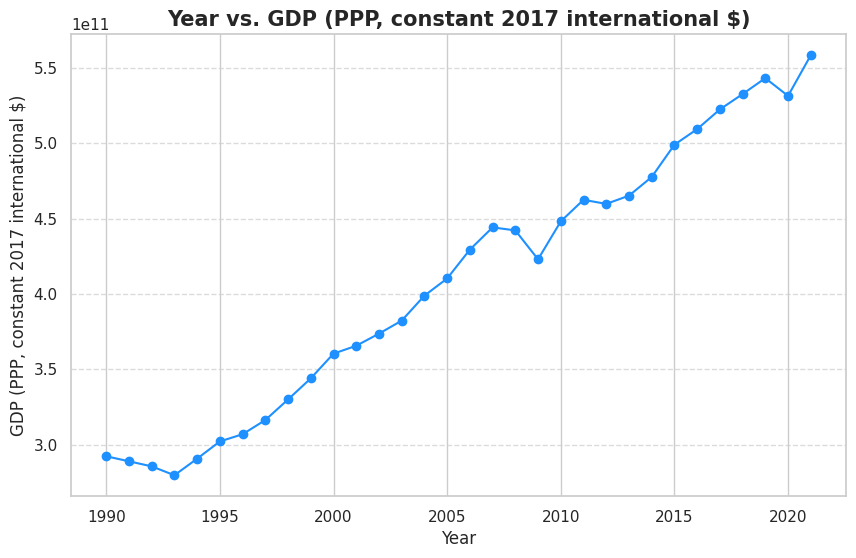

In [141]:
plt.figure(figsize=(10, 6))
plt.plot(sw['Year'], sw['GDP, PPP (constant 2017 international $)'], color='dodgerblue', marker='o', linestyle='-')

plt.title('Year vs. GDP (PPP, constant 2017 international $)', fontsize=15, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP (PPP, constant 2017 international $)', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

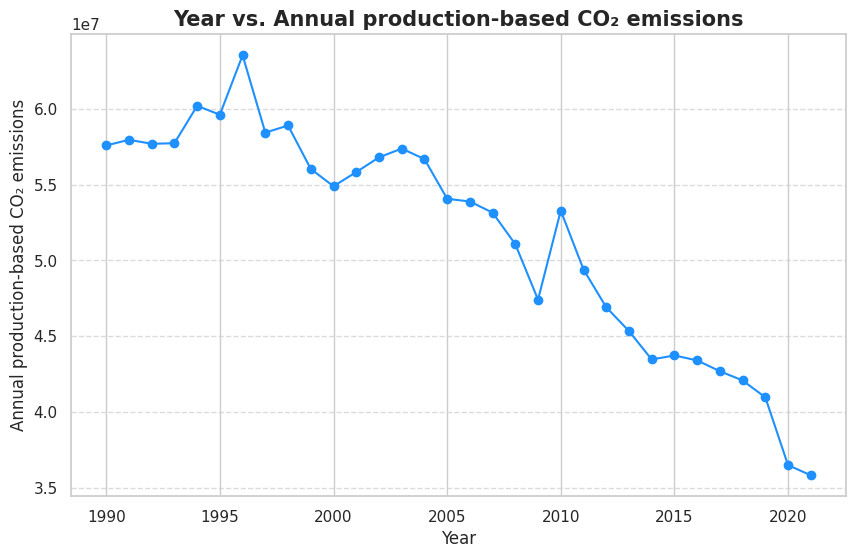

In [142]:
plt.figure(figsize=(10, 6))
plt.plot(sw['Year'], sw['Annual CO₂ emissions'], color='dodgerblue', marker='o', linestyle='-')
plt.title('Year vs. Annual production-based CO₂ emissions', fontsize=15, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Annual production-based CO₂ emissions', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

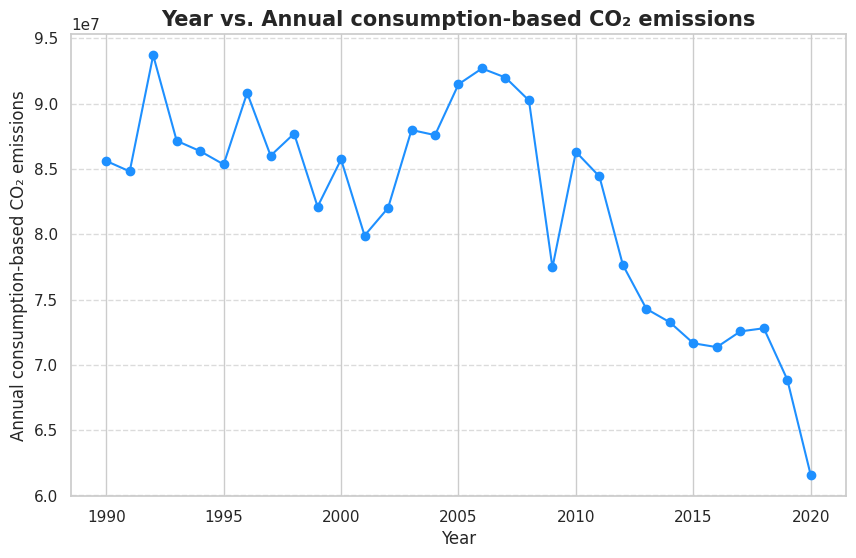

In [143]:
plt.figure(figsize=(10, 6))
plt.plot(sw['Year'], sw['Annual consumption-based CO₂ emissions'], color='dodgerblue', marker='o', linestyle='-')
plt.title('Year vs. Annual consumption-based CO₂ emissions', fontsize=15, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Annual consumption-based CO₂ emissions', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

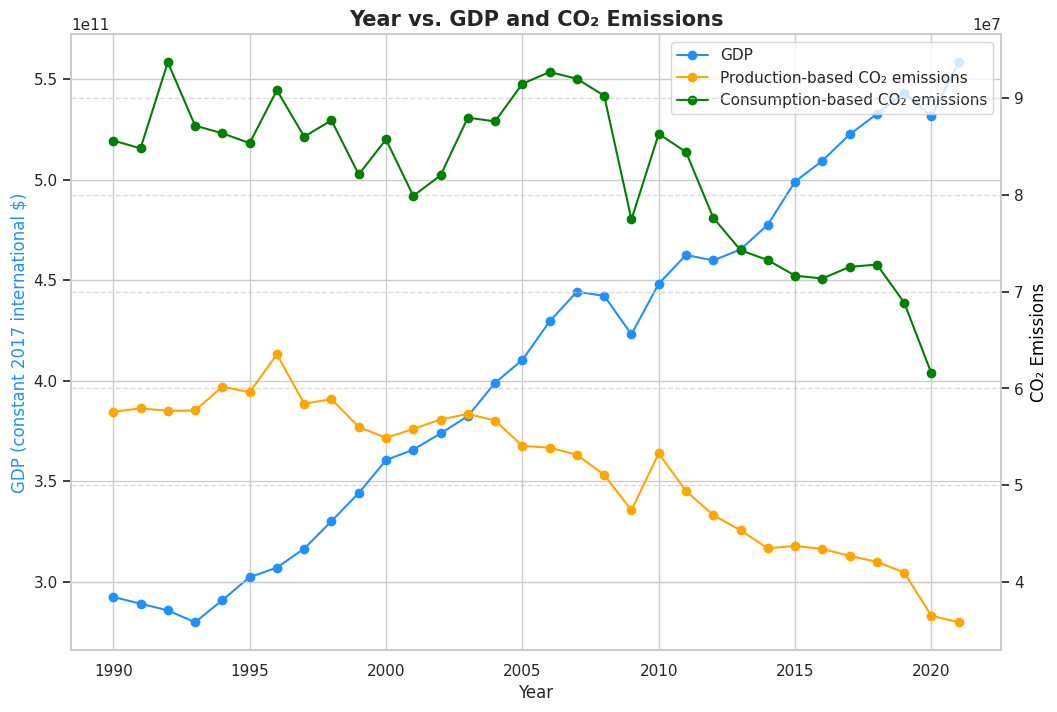

In [144]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(12, 8))
line1, = ax1.plot(sw['Year'], sw['GDP, PPP (constant 2017 international $)'], color='dodgerblue', marker='o', linestyle='-', label='GDP')
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('GDP (constant 2017 international $)', color='dodgerblue', fontsize=12)
ax2 = ax1.twinx()
line2, = ax2.plot(sw['Year'], sw['Annual CO₂ emissions'], color='orange', marker='o', linestyle='-', label='Production-based CO₂ emissions')
line3, = ax2.plot(sw['Year'], sw['Annual consumption-based CO₂ emissions'], color='green', marker='o', linestyle='-', label='Consumption-based CO₂ emissions')
ax2.set_ylabel('CO₂ Emissions', color='black', fontsize=12)
lines = [line1, line2, line3]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper right')
plt.title('Year vs. GDP and CO₂ Emissions', fontsize=15, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# #The graph clearly shows that GDP(PPP) is increasing and both co2 emmission types are decreasing over the years.


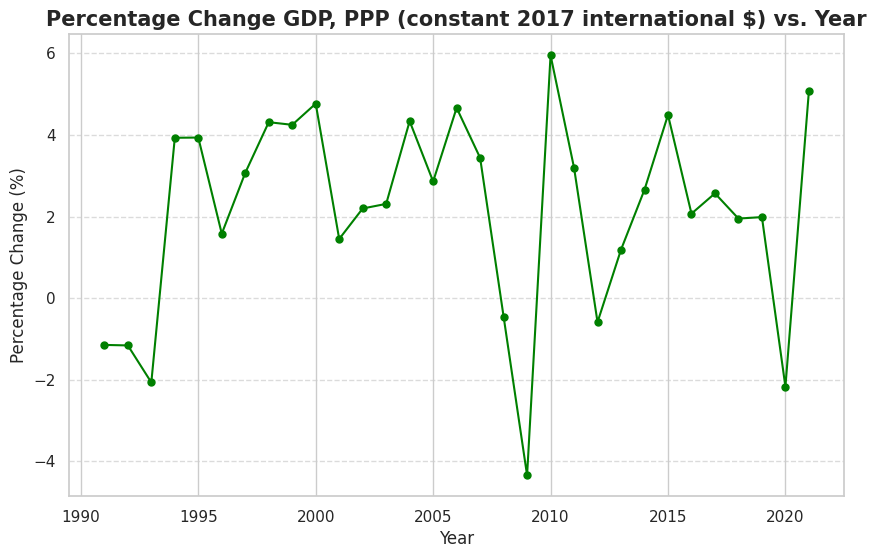

In [145]:
sw['Percentage Change'] = sw['GDP, PPP (constant 2017 international $)'].pct_change() * 100
plt.figure(figsize=(10, 6))
plt.plot(sw['Year'], sw['Percentage Change'], marker='o', color='green', linestyle='-', markersize=5)
plt.title('Percentage Change GDP, PPP (constant 2017 international $) vs. Year', fontsize=15, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage Change (%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

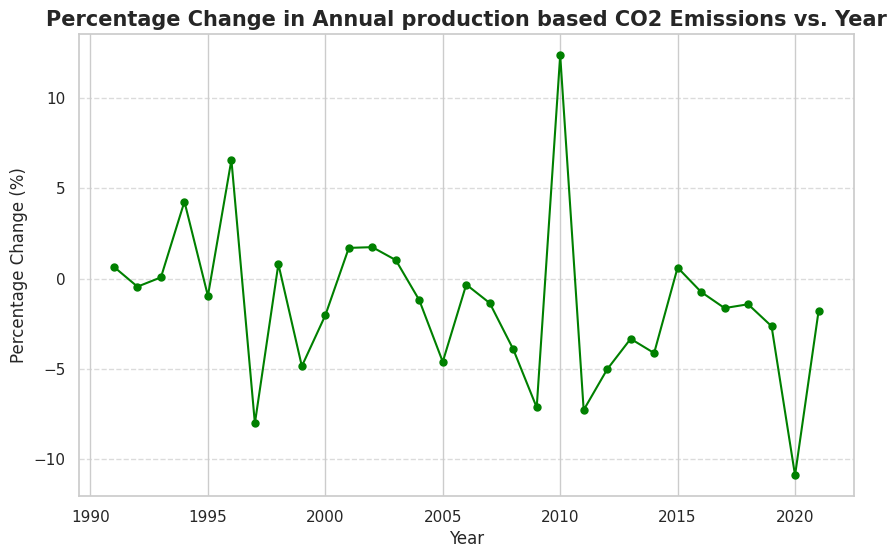

In [146]:
sw['Percentage Change'] = sw['Annual CO₂ emissions'].pct_change() * 100
plt.figure(figsize=(10, 6))
plt.plot(sw['Year'], sw['Percentage Change'], marker='o', color='green', linestyle='-', markersize=5)
plt.title('Percentage Change in Annual production based CO2 Emissions vs. Year', fontsize=15, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage Change (%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


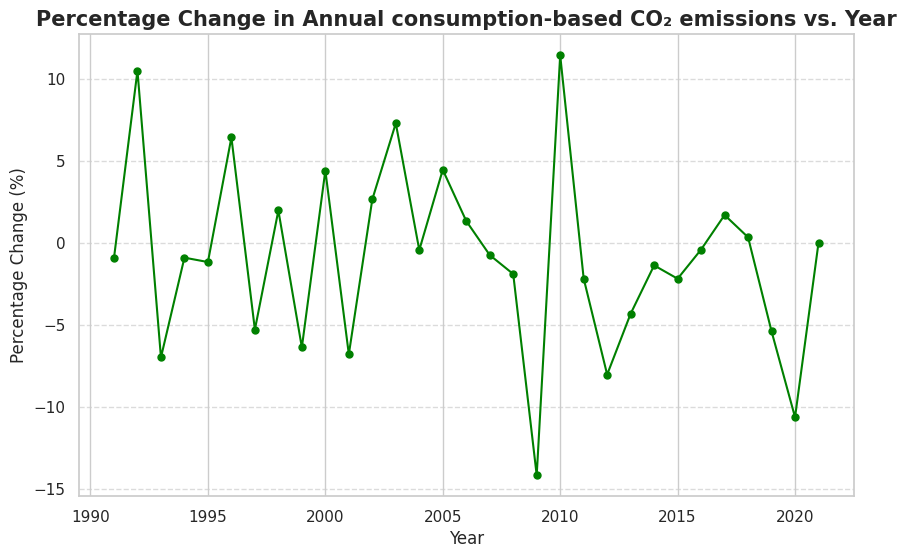

In [147]:
sw['Percentage Change'] = sw['Annual consumption-based CO₂ emissions'].pct_change() * 100
plt.figure(figsize=(10, 6))
plt.plot(sw['Year'], sw['Percentage Change'], marker='o', color='green', linestyle='-', markersize=5)
plt.title('Percentage Change in Annual consumption-based CO₂ emissions vs. Year', fontsize=15, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage Change (%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

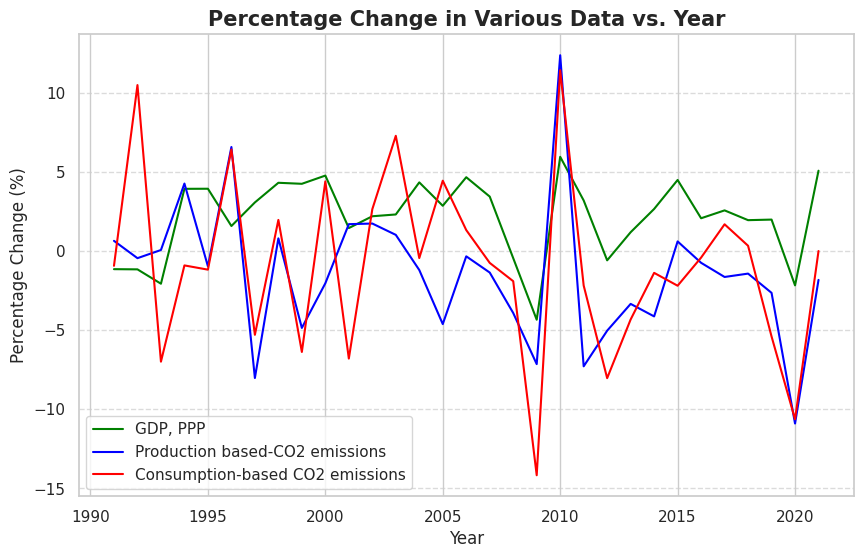

In [148]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sw['Percentage Change GDP'] = sw['GDP, PPP (constant 2017 international $)'].pct_change() * 100
sw['Percentage Change CO2 emissions'] = sw['Annual CO₂ emissions'].pct_change() * 100
sw['Percentage Change Consumption-based CO2 emissions'] = sw['Annual consumption-based CO₂ emissions'].pct_change() * 100
plt.plot(sw['Year'], sw['Percentage Change GDP'], marker='o', color='green', linestyle='-', markersize=0, label='GDP, PPP')
plt.plot(sw['Year'], sw['Percentage Change CO2 emissions'], marker='o', color='blue', linestyle='-', markersize=0, label='Production based-CO2 emissions')
plt.plot(sw['Year'], sw['Percentage Change Consumption-based CO2 emissions'], marker='o', color='red', linestyle='-', markersize=0, label='Consumption-based CO2 emissions')
plt.title('Percentage Change in Various Data vs. Year', fontsize=15, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage Change (%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

# This graph clearly shows that near 2020 the consumption based co2 emssions were dropped.

# Now we will predict consumption and production based co2 emissions.

In [149]:
from sklearn import linear_model
%matplotlib inline

Text(0, 0.5, 'Year')

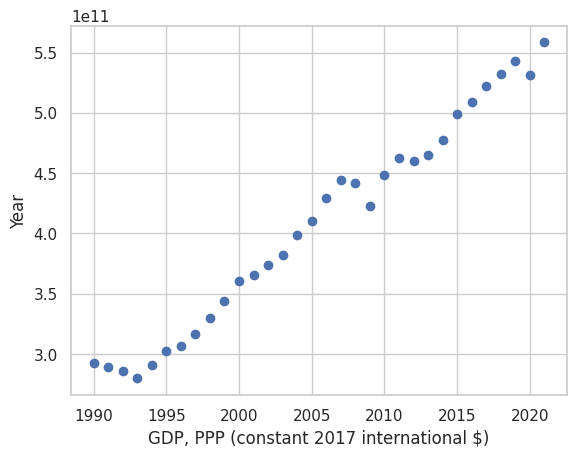

In [150]:

plt.scatter(sw['Year'],sw['GDP, PPP (constant 2017 international $)'])
plt.xlabel('GDP, PPP (constant 2017 international $)')
plt.ylabel('Year')

In [151]:
from sklearn.linear_model import LinearRegression

In [152]:
sw['Annual consumption-based CO₂ emissions'].fillna(0,inplace=True)

# Linear Regression model

In [157]:
x = sw['Year'].values.reshape(-1, 1)
y = sw['Annual CO₂ emissions']
model = LinearRegression()
model.fit(x, y)
t=int(input("Enter Year to predict: "))
year_to_predict =t
predicted_ap = model.predict([[year_to_predict]])
print('The predicted valye of production based co2 emission for year(in million metric tons):')
print(predicted_ap/1000000)

Enter Year to predict: 2023
The predicted valye of production based co2 emission for year(in million metric tons):
[38.74113799]


In [158]:
from sklearn.metrics import r2_score
r2 = r2_score(y, model.predict(x))
print(r2)

0.8630953359074349


In [159]:
x = sw['Year'].values.reshape(-1, 1)
y = sw['Annual consumption-based CO₂ emissions']
model = LinearRegression()
model.fit(x,y)
t=int(input("Enter Year to predict: "))
year_to_predict =t
predicted_cp = model.predict([[year_to_predict]])
print('The predicted valye of consumption based co2 emission for year:(in million metric tons)')
print(predicted_cp/1000000)

Enter Year to predict: 2025
The predicted valye of consumption based co2 emission for year:(in million metric tons)
[59.10286429]


In [160]:
from sklearn.metrics import r2_score
r2 = r2_score(y, model.predict(x))
print(r2)

0.35739048244632565


# Random forest

In [161]:
from sklearn.ensemble import RandomForestRegressor
x = sw['Year'].values.reshape(-1, 1)
y = sw['Annual CO₂ emissions']
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x, y)
t=int(input("Enter Year to predict:"))
year_to_predict = t
predicted_ap = model.predict([[year_to_predict]])
print('The predicted value of production based co2 emission for year(in million metric tons):')
print(predicted_ap/1000000)

Enter Year to predict:2026
The predicted value of production based co2 emission for year(in million metric tons):
[36.52866416]


In [162]:
from sklearn.metrics import r2_score
r2 = r2_score(y, model.predict(x))
print(r2)

0.9917118838027326


In [163]:
from sklearn.ensemble import RandomForestRegressor
x = sw['Year'].values.reshape(-1, 1)
y = sw['Annual consumption-based CO₂ emissions']
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x, y)
t=int(input("Enter Year to predict:"))
year_to_predict = t
predicted_ap = model.predict([[year_to_predict]])
print('The predicted value of consumption based co2 emission for year(in million metric tons is):')
print(predicted_ap/100000)

Enter Year to predict:2021
The predicted value of consumption based co2 emission for year(in million metric tons is):
[223.5864864]


In [164]:
from sklearn.metrics import r2_score
r2 = r2_score(y, model.predict(x))
print(r2)

0.9334557425013714


# Methane Emissions Around The World (1990-2018)
### historical emission of methane around the world

## Content
The dataset contains Historical Emissions of Methane Around the World from 1990 - 2018 for 195 countries.

### Columns
##### 1.Country: Name of the country
##### 2.Sector: Sector from which Methane is prouced. Is one of the following -
* Agriculture
* Energy
* Waste
* Industrial Processes
* Land Use Change and Forestry
* Fugitive Emissions
* Other Fuel Combustion
* Total Excluding LUCF = Agriculture + Energy + Waste + Industrial Processes
* Total Including LUCF = Total Excluding LUCF + Land Use Change and Forestry

#### 1.Gas: CH4
#### 2.Unit: MTCO2e - Metric tons of carbon dioxide
#### 3.Columns 2018-1990 : Data for specific year

In [165]:

import os
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.graph_objs import graph_objs as go

In [166]:
data = pd.read_csv("methane_hist_emissions.csv")
data_raw = data.copy()

In [167]:
data.shape

(1738, 33)

In [168]:
data.head()

Country                Sector  Gas    Unit     2018     2017     2016  \
0   China  Total including LUCF  CH4  MTCO2e  1238.95  1239.28  1242.43   
1   China  Total excluding LUCF  CH4  MTCO2e  1238.63  1239.13  1242.15   
2  Russia  Total including LUCF  CH4  MTCO2e   853.00   852.12   856.00   
3  Russia  Total excluding LUCF  CH4  MTCO2e   849.57   850.17   852.55   
4   China                Energy  CH4  MTCO2e   739.58   741.73   743.88   

      2015     2014     2013  ...    1999    1998    1997    1996    1995  \
0  1237.79  1206.51  1178.21  ...  826.57  814.80  792.55  824.63  798.90   
1  1237.52  1206.21  1178.02  ...  825.69  813.83  791.73  823.86  798.45   
2   837.01   833.59   827.06  ...  604.57  606.50  614.99  634.53  643.52   
3   835.56   830.22   825.64  ...  598.70  597.72  610.38  622.22  639.73   
4   746.03   723.02   700.01  ...  303.13  289.36  275.59  261.82  248.05   

     1994    1993    1992    1991    1990  
0  774.10  758.01  752.10  743.51  730.78  
1  773.65  757.56  751.66  743.07  730.34  
2  670.71  728.51  784.68  867.35  933.79  
3  666.92  724.72  780.89  863.52  929.97  
4  234.28  229.86  225.44  221.02  216.60  

[5 rows x 33 columns]

* #####  Handling Missing Values
Let us look at records where values are missing

In [169]:
data[data.isna().any(axis=1)]

Country                        Sector  Gas    Unit  2018  2017  \
1190        Micronesia          Total excluding LUCF  CH4  MTCO2e  0.06  0.06   
1214        Micronesia                   Agriculture  CH4  MTCO2e  0.05  0.05   
1251  Marshall Islands          Total excluding LUCF  CH4  MTCO2e  0.03  0.03   
1291             Palau          Total excluding LUCF  CH4  MTCO2e  0.02  0.02   
1460        Micronesia  Land-Use Change and Forestry  CH4  MTCO2e  0.00  0.00   
1577  Marshall Islands                   Agriculture  CH4  MTCO2e  0.00  0.00   
1578  Marshall Islands  Land-Use Change and Forestry  CH4  MTCO2e  0.00  0.00   
1637             Palau                   Agriculture  CH4  MTCO2e  0.00  0.00   
1638             Palau  Land-Use Change and Forestry  CH4  MTCO2e  0.00  0.00   

      2016  2015  2014  2013  ...  1999  1998  1997  1996  1995  1994  1993  \
1190  0.06  0.05  0.05  0.05  ...  0.05  0.05  0.05  0.05  0.05  0.01  0.00   
1214  0.05  0.05  0.04  0.04  ...  0.04  0.04  0.04  0.04  0.04  0.00  0.00   
1251  0.03  0.03  0.03  0.03  ...  0.03  0.03  0.03  0.03  0.03  0.03  0.03   
1291  0.02  0.02  0.02  0.02  ...  0.02  0.02  0.01  0.01  0.01  0.01  0.01   
1460  0.00  0.00  0.00  0.00  ...  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
1577  0.00  0.00  0.00  0.00  ...  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
1578  0.00  0.00  0.00  0.00  ...  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
1637  0.00  0.00  0.00  0.00  ...  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
1638  0.00  0.00  0.00  0.00  ...  0.00  0.00  0.00  0.00  0.00  0.00  0.00   

      1992  1991  1990  
1190  0.00  0.00   NaN  
1214  0.00  0.00   NaN  
1251  0.03  0.03   NaN  
1291  0.01  0.01   NaN  
1460  0.00  0.00   NaN  
1577  0.00  0.00   NaN  
1578  0.00  0.00   NaN  
1637  0.00  0.00   NaN  
1638  0.00  0.00   NaN  

[9 rows x 33 columns]

In [170]:
data.query('Country in ["Micronesia", "Marshall Islands", "Palau"] \
                and Sector in ["Total excluding LUCF","Agriculture", "Land-Use Change and Forestry"]')[["Country","1990", "1991", "1992", "1993", "1994"]]

Country  1990  1991  1992  1993  1994
1190        Micronesia   NaN  0.00  0.00  0.00  0.01
1214        Micronesia   NaN  0.00  0.00  0.00  0.00
1251  Marshall Islands   NaN  0.03  0.03  0.03  0.03
1291             Palau   NaN  0.01  0.01  0.01  0.01
1460        Micronesia   NaN  0.00  0.00  0.00  0.00
1577  Marshall Islands   NaN  0.00  0.00  0.00  0.00
1578  Marshall Islands   NaN  0.00  0.00  0.00  0.00
1637             Palau   NaN  0.00  0.00  0.00  0.00
1638             Palau   NaN  0.00  0.00  0.00  0.00

In [171]:
data.loc[:,"1990"].fillna(0.0, inplace=True)

In [172]:
data[data.isna().any(axis=1)]

Empty DataFrame
Columns: [Country, Sector, Gas, Unit, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990]
Index: []

[0 rows x 33 columns]

* #### Transforming Columns to Rows

In [173]:
data = data.melt(id_vars=["Country", "Sector", "Gas", "Unit"], value_vars=[str(y) for y in range(1990,2019)], var_name="Year", value_name="Emission")

In [174]:
data.query('Country == "India"').head(10)

Country                        Sector  Gas    Unit  Year  Emission
8      India          Total including LUCF  CH4  MTCO2e  1990    524.84
9      India          Total excluding LUCF  CH4  MTCO2e  1990    522.74
13     India                   Agriculture  CH4  MTCO2e  1990    433.94
51     India                        Energy  CH4  MTCO2e  1990     66.17
74     India                         Waste  CH4  MTCO2e  1990     22.64
100    India            Fugitive Emissions  CH4  MTCO2e  1990     26.51
124    India         Other Fuel Combustion  CH4  MTCO2e  1990     39.66
645    India  Land-Use Change and Forestry  CH4  MTCO2e  1990      2.10
1127   India          Industrial Processes  CH4  MTCO2e  1990      0.00
1746   India          Total including LUCF  CH4  MTCO2e  1991    530.63

This still feels weird, as every year entry has multiple sectors. Let's move it into columns

In [175]:
data = data.set_index(['Country', 'Year', 'Sector'])['Emission'].unstack(["Sector"]).reset_index()
data.columns.name= None

In [176]:
data.query('Country=="Maldives" and Year < "1995"')

Country  Year  Agriculture  Energy  Fugitive Emissions  \
3045  Maldives  1990          0.0     0.0                 0.0   
3046  Maldives  1991          0.0     0.0                 0.0   
3047  Maldives  1992          0.0     0.0                 0.0   
3048  Maldives  1993          0.0     0.0                 0.0   
3049  Maldives  1994          0.0     0.0                 0.0   

      Industrial Processes  Land-Use Change and Forestry  \
3045                   0.0                           0.0   
3046                   0.0                           0.0   
3047                   0.0                           0.0   
3048                   0.0                           0.0   
3049                   0.0                           0.0   

      Other Fuel Combustion  Total excluding LUCF  Total including LUCF  Waste  
3045                    0.0                  0.04                  0.04   0.04  
3046                    0.0                  0.05                  0.05   0.04  
3047                    0.0                  0.05                  0.05   0.05  
3048                    0.0                  0.05                  0.05   0.05  
3049                    0.0                  0.05                  0.05   0.05

In [177]:
data.fillna(0.0, inplace=True)

In [178]:
data.isna().sum()

Country                         0
Year                            0
Agriculture                     0
Energy                          0
Fugitive Emissions              0
Industrial Processes            0
Land-Use Change and Forestry    0
Other Fuel Combustion           0
Total excluding LUCF            0
Total including LUCF            0
Waste                           0
dtype: int64

## Exploratory Data Analysis

#### 1.How has Methane production grown over the years?
#### 2.Who are the largest contributors to Methane emission.
#### 3.Largest producers in the Last 5 years. (And how do they compare to overall producers)
#### 4.Largest producers in the 1990s.
#### 5.Country Rankings per Sector.

Let us filter out entries for the Entire World as we are only focusing on individual countries.

In [179]:
data = data[data.Country != "World"]

Calculating Total emissions for each Country, year

In [180]:
data["Total emissions (MTCO2e)"] = data["Total including LUCF"] + data["Fugitive Emissions"] + data["Other Fuel Combustion"]

In [181]:
data.head()

Country  Year  Agriculture  Energy  Fugitive Emissions  \
0  Afghanistan  1990         5.36    2.51                0.28   
1  Afghanistan  1991         5.61    2.29                0.24   
2  Afghanistan  1992         5.67    2.06                0.20   
3  Afghanistan  1993         5.72    1.84                0.16   
4  Afghanistan  1994         5.93    1.62                0.12   

   Industrial Processes  Land-Use Change and Forestry  Other Fuel Combustion  \
0                   0.0                           0.0                   2.23   
1                   0.0                           0.0                   2.04   
2                   0.0                           0.0                   1.86   
3                   0.0                           0.0                   1.68   
4                   0.0                           0.0                   1.50   

   Total excluding LUCF  Total including LUCF  Waste  Total emissions (MTCO2e)  
0                  8.97                  8.97   1.09                     11.48  
1                  9.07                  9.07   1.17                     11.35  
2                  8.99                  8.99   1.25                     11.05  
3                  8.89                  8.89   1.33                     10.73  
4                  8.96                  8.96   1.41                     10.58

#### 1. Methane Production over the years.

In [182]:
yearwise_total_emms = data.groupby("Year")["Total emissions (MTCO2e)"].sum().to_frame().reset_index()

In [183]:
px.line(
    data_frame=yearwise_total_emms,
    x="Year",
    y="Total emissions (MTCO2e)",
    title="Total Emissions over the years",
    template=dict(
        layout=go.Layout(
            title_x=0.5,
            xaxis={
                "showgrid": False,
                "ticks": "inside"
            },
            yaxis={
                "showgrid": True,
                "ticks": "inside"
            }
        )
    ),
    markers=True,
    color_discrete_sequence=["orange"]

)

#### 2. Largest Contributors to Methane
* Let's sum all emissions from 1990 - 2018 for each country

In [184]:
countrywise_total_emms = data.groupby("Country")["Total emissions (MTCO2e)"].sum()

In [185]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.bar(
    data_frame=countrywise_total_emms.sort_values(ascending=False)[:25].to_frame().reset_index(),
    x="Total emissions (MTCO2e)",
    y="Country",
    orientation='h',
    color="Country",
    title="Top 25 Countries by Emission",
    template={
        "layout": go.Layout(
            title_x=0.5,
            xaxis={
                "showgrid": True,
                "gridwidth": 2,
                "ticks": "inside",
            },
            yaxis={
                "showticklabels": True,
                "type": 'category',
                "dtick": 1
            }
        )
    },
    width=900,
    height=600
)


fig.show()


#### 3. Largest Contributors in Last 5 years
* Let's see how the overall top 5 compare to the latest top 5

In [186]:
def get_top_rank(d, n=5):
    d = d.sort_values(by="Total emissions (MTCO2e)",ascending=False).head(n)["Country"]
    d.index = np.arange(len(d)) + 1
    d.index = "Rank #" + d.index.astype(str)
    d = d.transpose()
    return d

In [187]:
get_top_rank(data.query('Year == "1990"'))

Rank #1                 Russia
Rank #2          United States
Rank #3                  China
Rank #4    European Union (27)
Rank #5                  India
Name: Country, dtype: object

In [188]:

data[data.Country != "World"].groupby("Year").apply(get_top_rank).sort_index(ascending=False)[:5]

Country Rank #1 Rank #2        Rank #3 Rank #4              Rank #5
Year                                                               
2018      China  Russia  United States   India  European Union (27)
2017      China  Russia  United States   India  European Union (27)
2016      China  Russia  United States   India  European Union (27)
2015      China  Russia  United States   India  European Union (27)
2014      China  Russia  United States   India  European Union (27)



#### 4. Largest Contibutors in the 90s
Were things different back then? Let's find out.

In [189]:
data[data.Country != "World"].groupby("Year").apply(get_top_rank).sort_index(ascending=True)[:10]

Country Rank #1        Rank #2        Rank #3              Rank #4  \
Year                                                                 
1990     Russia  United States          China  European Union (27)   
1991     Russia  United States          China  European Union (27)   
1992     Russia  United States          China  European Union (27)   
1993     Russia  United States          China  European Union (27)   
1994     Russia  United States          China  European Union (27)   
1995     Russia  United States          China  European Union (27)   
1996      China  United States         Russia  European Union (27)   
1997      China  United States         Russia  European Union (27)   
1998      China         Russia  United States                India   
1999      China         Russia  United States                India   

Country              Rank #5  
Year                          
1990                   India  
1991                   India  
1992                   India  
1993                   India  
1994                   India  
1995                   India  
1996                   India  
1997                   India  
1998     European Union (27)  
1999     European Union (27)

#### 5. Rankings per Sector
* What are the rankings based on each sector? are they all consistent throughout all sectors? Let's find out.

* Let us only consider 2018's data (latest in dataset) as it is the most relevant ranking.

In [190]:
data_2018 = data.query('Year=="2018"')

In [191]:
data_2018.rename(columns={"Total emissions (MTCO2e)": "Total emissions"}, inplace=True)

In [192]:
rows = 2
cols = 4

sectors = [ 'Total emissions', 'Agriculture', 'Energy', 'Waste', 'Land-Use Change and Forestry',
       'Fugitive Emissions', 'Other Fuel Combustion',  'Industrial Processes']

subplot_titles = [l for l in sectors]

specs = [[{'type':'bar'}] * cols] * rows

fig = make_subplots(
        rows=rows,
        cols=cols,
        subplot_titles=subplot_titles,
        specs=specs)

for i, s in enumerate(sectors):
    row = i // cols + 1
    col = i % cols +1

    d = data_2018.sort_values(by=s,ascending=False)[:5]


    fig.add_trace(
        go.Bar(
            x=d["Country"],
            y=d[s],
            showlegend=False,
            legendgroup="Countries",
            textposition='outside',
            texttemplate="%{y}",
            name=s
        ),
        row=row,
        col=col
    )

for i in range(1,rows*cols+1):
    fig['layout']['yaxis{}'.format(i)]['title']= 'Emissions (MTCO2e)'

fig.update_layout(title="Top 5 Methane Contributors By Sector", title_x=0.5, height=1500)
fig.update_yaxes(
    range=[0,2500],
)
fig.show()

#### Interesting observations:

* Brazil is ranked #3 in Agriculture sector, but it is ranked #24 in overall emissions.
* Iran produces more methane in the Energy sector #4 compared to India.0
* Indonesia is ranked #2 in Waste sector although it is ranked #79 in overall emissions.


In [193]:
data=data[data['Country']=='India']

In [194]:
data.head()

Country  Year  Agriculture  Energy  Fugitive Emissions  \
2233   India  1990       433.94   66.17               26.51   
2234   India  1991       437.56   67.73               27.70   
2235   India  1992       440.17   69.28               28.89   
2236   India  1993       443.69   70.84               30.08   
2237   India  1994       446.37   72.40               31.28   

      Industrial Processes  Land-Use Change and Forestry  \
2233                  0.00                           2.1   
2234                  0.00                           2.1   
2235                  0.00                           2.1   
2236                  0.00                           2.1   
2237                  0.05                           2.1   

      Other Fuel Combustion  Total excluding LUCF  Total including LUCF  \
2233                  39.66                522.74                524.84   
2234                  40.03                528.53                530.63   
2235                  40.39                533.31                535.41   
2236                  40.76                539.00                541.10   
2237                  41.13                543.90                545.99   

      Waste  Total emissions (MTCO2e)  
2233  22.64                    591.01  
2234  23.25                    598.36  
2235  23.86                    604.69  
2236  24.47                    611.94  
2237  25.08                    618.40

# Predicting total emissions for India

# Linear Regression

In [196]:
x = data['Year'].values.reshape(-1, 1)
y = data['Total emissions (MTCO2e)']
model = LinearRegression()
model.fit(x, y)
t=int(input("Enter Year to predict: "))
year_to_predict =t
predicted_ap = model.predict([[year_to_predict]])
print('The predicted value of co2 emission for year(in million metric tons): of India is::')
print(predicted_ap/1000000)

Enter Year to predict: 2023
The predicted value of co2 emission for year(in million metric tons): of India is::
[0.00082782]


In [197]:
from sklearn.metrics import r2_score
r2 = r2_score(y, model.predict(x))
print(r2)

0.9488735054405373


# Random forest

In [198]:
from sklearn.ensemble import RandomForestRegressor
x = data['Year'].values.reshape(-1, 1)
y = data['Total emissions (MTCO2e)']
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x, y)
t=int(input("Enter Year to predict:"))
year_to_predict = t
predicted_ap = model.predict([[year_to_predict]])
print('The predicted value of co2 emission for year(in million metric tons):')
print(predicted_ap/1000000)

Enter Year to predict:2024
The predicted value of co2 emission for year(in million metric tons):
[0.00076584]


In [199]:
from sklearn.metrics import r2_score
r2 = r2_score(y, model.predict(x))
print(r2)

0.9989042382403244


# Change in Global Average Tempreature

In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [201]:
tp=pd.read_csv('temperature-anomaly.csv')

In [202]:
tp.head()

Entity  Code  Year  \
0  Global   NaN  1850   
1  Global   NaN  1851   
2  Global   NaN  1852   
3  Global   NaN  1853   
4  Global   NaN  1854   

   Global average temperature anomaly relative to 1961-1990  \
0                                          -0.417659          
1                                          -0.233350          
2                                          -0.229399          
3                                          -0.270354          
4                                          -0.291630          

   Upper bound of the annual temperature anomaly (95% confidence interval)  \
0                                          -0.246115                         
1                                          -0.054832                         
2                                          -0.049416                         
3                                          -0.110700                         
4                                          -0.150436                         

   Lower bound of the annual temperature anomaly (95% confidence interval)  
0                                          -0.589203                        
1                                          -0.411868                        
2                                          -0.409382                        
3                                          -0.430009                        
4                                          -0.432824

In [203]:
tp.tail()

Entity  Code  Year  \
517  Southern hemisphere   NaN  2019   
518  Southern hemisphere   NaN  2020   
519  Southern hemisphere   NaN  2021   
520  Southern hemisphere   NaN  2022   
521  Southern hemisphere   NaN  2023   

     Global average temperature anomaly relative to 1961-1990  \
517                                           0.638402          
518                                           0.569861          
519                                           0.445762          
520                                           0.502866          
521                                           0.755306          

     Upper bound of the annual temperature anomaly (95% confidence interval)  \
517                                           0.691337                         
518                                           0.622008                         
519                                           0.499180                         
520                                           0.557362                         
521                                           0.838973                         

     Lower bound of the annual temperature anomaly (95% confidence interval)  
517                                           0.585467                        
518                                           0.517714                        
519                                           0.392344                        
520                                           0.448371                        
521                                           0.671640

In [204]:
if 'Code' in tp.columns:
    tp = tp.drop(columns=['Code'])

In [205]:
tp.head()

Entity  Year  Global average temperature anomaly relative to 1961-1990  \
0  Global  1850                                          -0.417659          
1  Global  1851                                          -0.233350          
2  Global  1852                                          -0.229399          
3  Global  1853                                          -0.270354          
4  Global  1854                                          -0.291630          

   Upper bound of the annual temperature anomaly (95% confidence interval)  \
0                                          -0.246115                         
1                                          -0.054832                         
2                                          -0.049416                         
3                                          -0.110700                         
4                                          -0.150436                         

   Lower bound of the annual temperature anomaly (95% confidence interval)  
0                                          -0.589203                        
1                                          -0.411868                        
2                                          -0.409382                        
3                                          -0.430009                        
4                                          -0.432824

In [206]:
tp.columns

Index(['Entity', 'Year',
       'Global average temperature anomaly relative to 1961-1990',
       'Upper bound of the annual temperature anomaly (95% confidence interval)',
       'Lower bound of the annual temperature anomaly (95% confidence interval)'],
      dtype='object')

In [207]:
tp.info

<bound method DataFrame.info of                   Entity  Year  \
0                 Global  1850   
1                 Global  1851   
2                 Global  1852   
3                 Global  1853   
4                 Global  1854   
..                   ...   ...   
517  Southern hemisphere  2019   
518  Southern hemisphere  2020   
519  Southern hemisphere  2021   
520  Southern hemisphere  2022   
521  Southern hemisphere  2023   

     Global average temperature anomaly relative to 1961-1990  \
0                                            -0.417659          
1                                            -0.233350          
2                                            -0.229399          
3                                            -0.270354          
4                                            -0.291630          
..                                                 ...          
517                                           0.638402          
518                                           0.569861          
519                                           0.445762          
520                                           0.502866          
521                                           0.755306          

     Upper bound of the annual temperature anomaly (95% confidence interval)  \
0                                            -0.246115                         
1                                            -0.054832                         
2                                            -0.049416                         
3                                            -0.110700                         
4                                            -0.150436                         
..                                                 ...                         
517                                           0.691337                         
518                                           0.622008                         
519                                           0.499180                         
520                                           0.557362                         
521                                           0.838973                         

     Lower bound of the annual temperature anomaly (95% confidence interval)  
0                                            -0.589203                        
1                                            -0.411868                        
2                                            -0.409382                        
3                                            -0.430009                        
4                                            -0.432824                        
..                                                 ...                        
517                                           0.585467                        
518                                           0.517714                        
519                                           0.392344                        
520                                           0.448371                        
521                                           0.671640                        

[522 rows x 5 columns]>

In [208]:
tp.shape

(522, 5)

In [209]:
tp.isna().sum()

Entity                                                                     0
Year                                                                       0
Global average temperature anomaly relative to 1961-1990                   0
Upper bound of the annual temperature anomaly (95% confidence interval)    0
Lower bound of the annual temperature anomaly (95% confidence interval)    0
dtype: int64

# No null values are there

In [210]:
tp.Entity.unique()

array(['Global', 'Northern hemisphere', 'Southern hemisphere'],
      dtype=object)

In [211]:
tp.Year.unique()

array([1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860,
       1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871,
       1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882,
       1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893,
       1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904,
       1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915,
       1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926,
       1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937,
       1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948,
       1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 20

In [212]:
print(tp.Year.max())
print(tp.Year.min())

2023
1850


#Global Average Temperature: This is the average temperature of the Earth over a specific period.
#Anomaly: An anomaly is the difference between the temperature in a given year (or period) and a reference temperature. In this case, the reference period is 1961-1990.

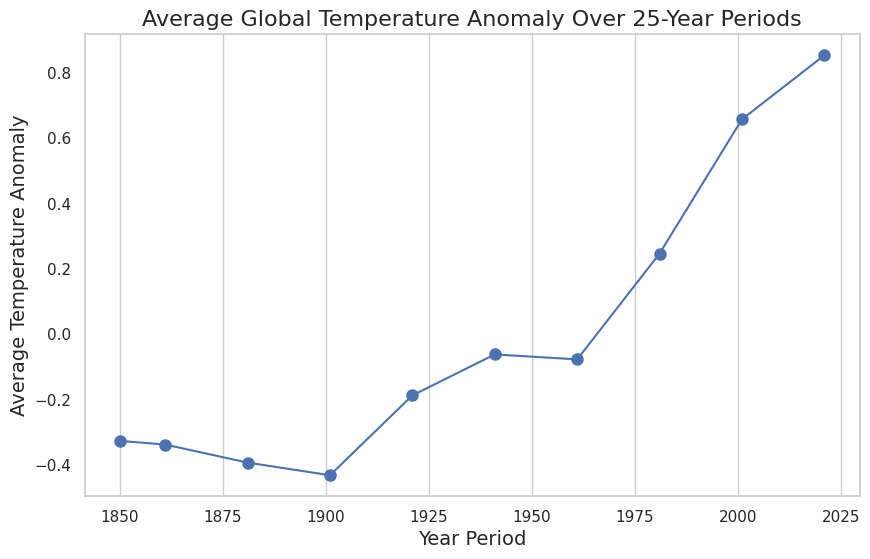

In [213]:
year = tp['Year']
temperature_anomaly = tp['Global average temperature anomaly relative to 1961-1990']
period = (year - 1) // 20 * 20 + 1
grouped = tp.groupby(period)
average_anomaly = grouped['Global average temperature anomaly relative to 1961-1990'].mean()
period_labels = grouped['Year'].first()
plt.figure(figsize=(10, 6))
plt.plot(period_labels, average_anomaly, marker='o', linestyle='-', color='b', markersize=8)
plt.title('Average Global Temperature Anomaly Over 25-Year Periods', fontsize=16)
plt.xlabel('Year Period', fontsize=14)
plt.ylabel('Average Temperature Anomaly', fontsize=14)
plt.grid(axis='y')
plt.show()

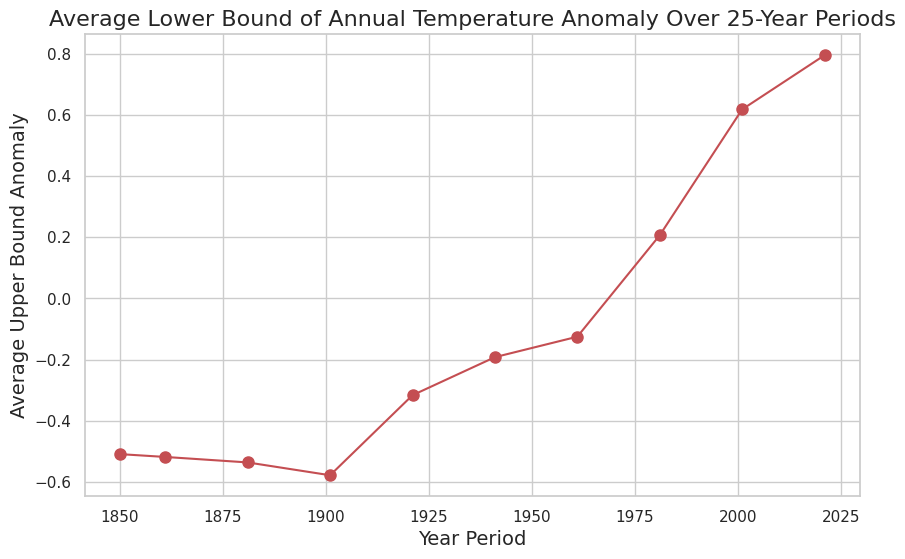

In [214]:
year = tp['Year']
upper_bound_anomaly = tp['Lower bound of the annual temperature anomaly (95% confidence interval)']
period = (year - 1) // 20 * 20 + 1
grouped = tp.groupby(period)
average_upper_bound_anomaly = grouped['Lower bound of the annual temperature anomaly (95% confidence interval)'].mean()
period_labels = grouped['Year'].first()
plt.figure(figsize=(10, 6))
plt.plot(period_labels, average_upper_bound_anomaly, marker='o', linestyle='-', color='r', markersize=8, label='Upper Bound Anomaly')
plt.title('Average Lower Bound of Annual Temperature Anomaly Over 25-Year Periods', fontsize=16)
plt.xlabel('Year Period', fontsize=14)
plt.ylabel('Average Upper Bound Anomaly', fontsize=14)
plt.grid(True)
plt.show()

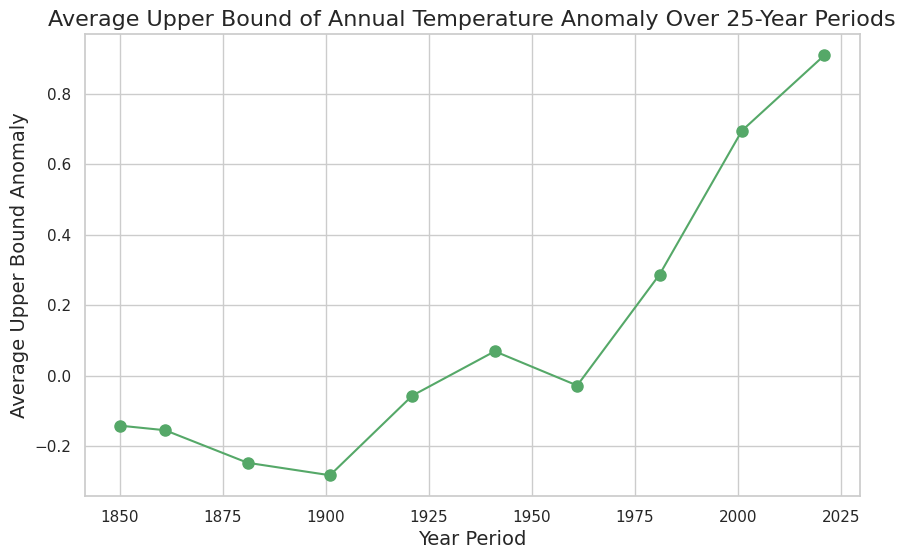

In [215]:
year = tp['Year']
upper_bound_anomaly = tp['Upper bound of the annual temperature anomaly (95% confidence interval)']
period = (year - 1) // 20 * 20 + 1
grouped = tp.groupby(period)
average_upper_bound_anomaly = grouped['Upper bound of the annual temperature anomaly (95% confidence interval)'].mean()
period_labels = grouped['Year'].first()
plt.figure(figsize=(10, 6))
plt.plot(period_labels, average_upper_bound_anomaly, marker='o', linestyle='-', color='g', markersize=8, label='Upper Bound Anomaly')
plt.title('Average Upper Bound of Annual Temperature Anomaly Over 25-Year Periods', fontsize=16)
plt.xlabel('Year Period', fontsize=14)
plt.ylabel('Average Upper Bound Anomaly', fontsize=14)
plt.grid(True)
plt.show()

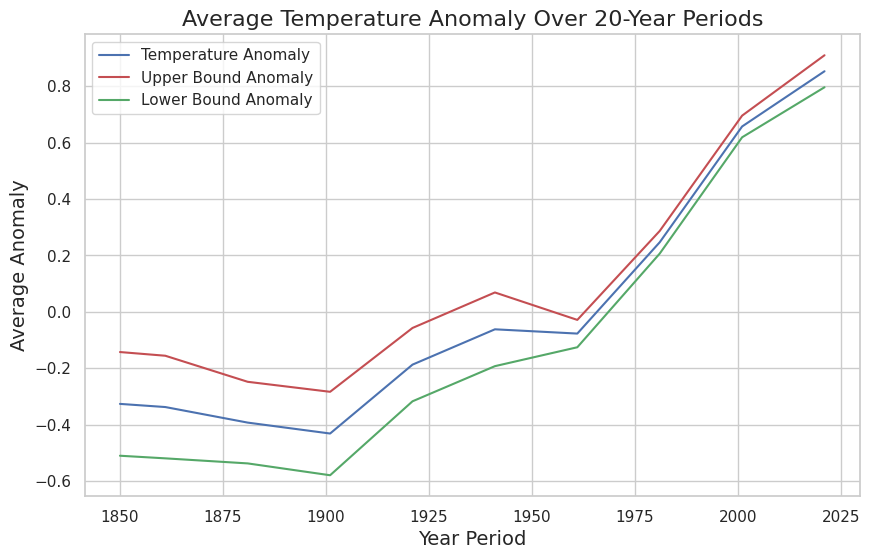

In [216]:
year = tp['Year']
temperature_anomaly = tp['Global average temperature anomaly relative to 1961-1990']
upper_bound_anomaly = tp['Upper bound of the annual temperature anomaly (95% confidence interval)']
lower_bound_anomaly = tp['Lower bound of the annual temperature anomaly (95% confidence interval)']
period = (year - 1) // 20 * 20 + 1
grouped = tp.groupby(period)
average_anomaly = grouped['Global average temperature anomaly relative to 1961-1990'].mean()
average_upper_bound_anomaly = grouped['Upper bound of the annual temperature anomaly (95% confidence interval)'].mean()
average_lower_bound_anomaly = grouped['Lower bound of the annual temperature anomaly (95% confidence interval)'].mean()
period_labels = grouped['Year'].first()
plt.figure(figsize=(10, 6))
plt.plot(period_labels, average_anomaly, marker='o', linestyle='-', color='b', markersize=0, label='Temperature Anomaly')
plt.plot(period_labels, average_upper_bound_anomaly, marker='o', linestyle='-', color='r', markersize=0, label='Upper Bound Anomaly')
plt.plot(period_labels, average_lower_bound_anomaly, marker='o', linestyle='-', color='g', markersize=0, label='Lower Bound Anomaly')
plt.title('Average Temperature Anomaly Over 20-Year Periods', fontsize=16)
plt.xlabel('Year Period', fontsize=14)
plt.ylabel('Average Anomaly', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

# Predicting GLobal Temperature Anomaly

# Linear regression

In [217]:
x = tp['Year'].values.reshape(-1, 1)
y = tp['Global average temperature anomaly relative to 1961-1990']
model = LinearRegression()
model.fit(x, y)
t=int(input("Enter Year to predict: "))
year_to_predict =t
predicted_a = model.predict([[year_to_predict]])
print('The predicted value of GLOBAL Temperature anomaly is::')
print(predicted_a)

Enter Year to predict: 2025
The predicted value of GLOBAL Temperature anomaly is::
[0.48810806]


In [218]:
from sklearn.metrics import r2_score
r2 = r2_score(y, model.predict(x))
print(r2)

0.6768303885017962


# Random Forest

In [219]:
from sklearn.ensemble import RandomForestRegressor
x = tp['Year'].values.reshape(-1, 1)
y = tp['Global average temperature anomaly relative to 1961-1990']
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x, y)
t=int(input("Enter Year to predict:"))
year_to_predict = t
predicted_r = model.predict([[year_to_predict]])
print('The predicted value of GLOBAL Temperature anomaly is::')
print(predicted_r)

Enter Year to predict:2023
The predicted value of GLOBAL Temperature anomaly is::
[0.99174411]


In [220]:
from sklearn.metrics import r2_score
r2 = r2_score(y, model.predict(x))
print(r2)

0.9455460459800895
